# SSFM VERSION-2

In [53]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import scipy
import pandas as pd
import tdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import hypnogram as hp
import kd_analysis.main.utils as kd
import kd_analysis.main.plots as kp
import neurodsp.plts.utils as dspu
import sleep_score_for_me.v1.ssfm_v1 as ss
import sleep_score_for_me.utils.ssfm_utils as ssu


bp_def = dict(delta=(0.5, 4), theta=(4, 8), sigma = (11, 16), beta = (13, 20), low_gamma = (40, 55), high_gamma = (65, 80), omega=(300, 700))

kd_ref = {}
kd_ref['echans'] = [1,2]
kd_ref['fchans']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
kd_ref['analysis_root'] = Path('/Volumes/paxilline/Data/paxilline_project_materials/PAX_7/PAX_7_analysis_data')
kd_ref['tank_root'] = Path(r"N:\Data\PAX_7\PAX_7_TANK")
kd_ref['key_list'] = ['list of strings']

In [2]:
hypno_colors = {
    "Wake": "forestgreen",
    "Brief-Arousal": "chartreuse",
    "Transition-to-NREM": "lightskyblue",
    "Transition-to-Wake": "palegreen",
    "NREM": "royalblue",
    "Transition-to-REM": "plum",
    "REM": "magenta",
    "Transition": "grey",
    "Art": "crimson",
    "Wake-art": "crimson",
    "Unsure": "white",
    }

In [5]:
# Standard test dataset for SSFM:
data_path = '/Volumes/paxilline/Data/PAX_7/PAX_7_TANK/PAX_7-dmso-bl'
ssfm = {}
ssfm['e'], ssfm['espg'] = kd.get_data_spg(data_path, store='EEGr', t1=0, t2=7200, channel=kd_ref['echans'], window_length=10, overlap=1)
ssfm['m'], ssfm['mspg'] = kd.get_data_spg(data_path, store='EMGr', t1=0, t2=7200, channel=[1,2], window_length=10, overlap=1)
ssfm['e_pd'], ssfm['espg_pd'] = kd.get_data_spg(data_path, store='EEGr', t1=0, t2=7200, channel=kd_ref['echans'], window_length=10, overlap=1, pandas=True)
ssfm['m_pd'], ssfm['mspg_pd'] = kd.get_data_spg(data_path, store='EMGr', t1=0, t2=7200, channel=[1,2], window_length=10, overlap=1, pandas=True)
ssfm['ebp_pd'] = kd.get_bp_set2(ssfm['espg'], bands=bp_def, pandas=True)
ssfm['ebp'] = kd.get_bp_set2(ssfm['espg'], bands=bp_def, pandas=False)

muscle_bands = dict(delta=(0,4), omega=(1, 800))
ssfm['mbp_pd'] = kd.get_bp_set2(ssfm['mspg'], bands=muscle_bands, pandas=True)

subject = "PAX_7"
exp = "exp-2"
p_2h = "/Volumes/paxilline/Data//paxilline_project_materials/PAX_7/hypnograms-PAX_7/hypno_dmso_BL1.txt"
ssfm['hyp_full'] = kd.load_hypnograms(subject, exp, "dmso-bl", ssfm['espg'].datetime.values.min())
ssfm['hyp_2hr'] = ssu.load_hypno(p_2h, ssfm['espg'].datetime.values.min())

# Not using LFP for now...
# ssfm['f'], ssfm['fspg'] = kd.get_data_spg(data_path, store='LFP_', t1=0, t2=7200, channel=kd_ref['fchans'], dt_dim=True)

read from t=0s to t=7502.02s
Using 1525.8789 Hz as SEV sampling rate for EEGr
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=7502.02s
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=7502.02s
Using 1525.8789 Hz as SEV sampling rate for EEGr
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=7502.02s
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset


## Misc stuff, not sure if useful.

In [ ]:
dgr = ssfm['ebp_pd']['delta']/ssfm['ebp_pd']['high_gamma']
dgr2 = dgr.xs(2, level='channel')

In [ ]:
m1_omega = ssfm['mbp_pd']['omega']/1

In [ ]:
m1_omega = m1_omega.xs(1, level='channel')

In [ ]:
e2d = ssfm['ebp_pd']['delta'].xs(2, level='channel')
e2g = ssfm['ebp_pd']['high_gamma'].xs(2, level='channel')
m1o = ssfm['mbp_pd']['omega'].xs(1, level='channel')

In [ ]:
sig_eeg2 = ssfm['ebp_pd']['sigma'].xs(2, level='channel')

In [ ]:
dgr_eeg2 = e2d/e2g
der_eeg2 = e2d/m1o.values
golden_ratio_ssfm = dgr_eeg2/m1o.values

In [ ]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=dgr2, ax=ax)

In [ ]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=golden_ratio_ssfm, ax=ax)

In [ ]:
%matplotlib widget 
ax = newgr.plot.hist(bins=1000)
ax.set_xlim(0, 0.1)

In [ ]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=newgr, ax=ax)
#ax.set_ylim(0, 0.2)

In [ ]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=sig_eeg2, ax=ax)

In [ ]:
spg = ssfm['espg']
fig, axs = kp.plot_bp_set(spg, bp_def, hyp=ssfm['hyp_2hr'], channel=2, start_time=spg.datetime.min(), end_time=spg.datetime.max())

In [ ]:
muscle_bands = dict(zeta=(100, 200), omega=(1, 800), phi=(400,700), x=(100, 800))
spg = ssfm['mspg']
fig, axs = kp.plot_bp_set(spg, muscle_bands, hyp=None, channel=1, start_time=spg.datetime.min(), end_time=spg.datetime.max())

In [ ]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=ssfm['m'], ax=ax)

# SSFM V2

In [206]:
per = stats.mode(np.diff(old_dt)).mode[0]

per = per / pd.to_timedelta(1, "ns")

new_period = str(per)+'ns'
new_period

str(new_period[0].value)+'ns'

even_dti = pd.date_range(start, periods=len(old_dt), freq=new_period)

In [249]:
"""VERSION-2 DEVELOPMENT"""
"""
Functions Needed to do the actual scoring and build the hypnogram
-----------------------------------------------------------------
"""

def ssfm_v2(spg, emg_spg, nrem_percentiles=[50, 60, 65, 70], rem_percentiles=[60, 70, 80, 85], chan=2, user_hyp=None):
    """Uses the metrics and scoring techniques of Watson et al., 2016 (Neuron) to score a chunk of data into NREM, REM, and Wake
    
    spg --> xarray spectrogram containing the channel you wish to use for scoring (can contain other channels as well, as long as 'chan' option is used)
    emg_spg --> spectrogram of emg, channel 1 is always selected out by default
    chan --> the channel you want to use (should choose a parietal EEG if possible)
    f_range --> the range of frequencies to use for the PCA
    percentiles --> these are the percentiles you want to see plotted in order to determine the NREM and REM threshold values"""

    try:
        spg = spg.sel(channel=chan)
    except KeyError:
        print('Passing Channel Selection Error, Data Already Contains Single Channel')
    
    # This gets our datetime index evenly spaced so the hypnogram comes out concatenated correctly
    dt_original = spg.datetime.values
    start = dt_original.min()
    dt_freq = scipy.stats.mode(np.diff(dt_original)).mode[0]
    dt_freq = dt_freq / pd.to_timedelta(1, "ns")
    dt_freq = str(dt_freq)+'ns'
    new_dti = pd.date_range(start, periods=len(dt_original), freq=dt_freq)
    spg = spg.assign_coords(datetime=new_dti)
    
    
    # First we get the EMG Band: 
    emg_bands = kd.get_bp_set2(emg_spg, bands=bp_def, pandas=True)
    emg = emg_bands.xs(1, level='channel').omega
    
    # Then we get the delta metric to be used for NREM scoring:
    delta = kd.get_bandpower(spg, f_range=(0.5, 4))
    delta_smooth = kd.get_smoothed_da(delta, smoothing_sigma=8)

    # Then Theta Band:
    theta_narrow = (5, 10)
    theta_wide = (2, 16)
    tn = kd.get_bandpower(spg, f_range=theta_narrow)
    tn = kd.get_smoothed_da(tn, smoothing_sigma=8)
    tw = kd.get_bandpower(spg, f_range=theta_wide)
    tw = kd.get_smoothed_da(tw, smoothing_sigma=8)  
    thetaband = tn/tw
    thetaband = (thetaband/emg)/emg

    # Now we can construct the Dataframe which will be used to assign states
    dt_ix = spg.datetime.values
    scoring_df = pd.Series(delta_smooth, index=dt_ix)
    scoring_df = scoring_df.to_frame(name='Delta')
    scoring_df['Theta'] = thetaband.values
    scoring_df['EMG'] = emg.values
    scoring_df['state'] = np.nan 
    
    # Now we need to figure out and set the thresholds for scoring out the NREM:
    hist, delta_ax = threshplot(delta_smooth, time=spg.datetime.values, percentiles=nrem_percentiles)
    print("Violet --> " + str(nrem_percentiles[0]))
    print("Blue --> " + str(nrem_percentiles[1]))
    print("Green --> " + str(nrem_percentiles[2]))
    print("Red --> " + str(nrem_percentiles[3]))
    
    nrem_threshold = float(input("Enter NREM Threshold: "))
    nrem_threshold = np.percentile(delta_smooth, nrem_threshold)

    #This is where we actually "score" the NREM based on a simple threshold value
    scoring_df.loc[scoring_df.Delta >= nrem_threshold, 'state'] = 'NREM'
    
    # Now we need to set the threshold for REM::
    hist_rem, theta = threshplot(data=thetaband.values, time=spg.datetime.values, percentiles=rem_percentiles)
    print("Violet --> " + str(rem_percentiles[0]))
    print("Blue --> " + str(rem_percentiles[1]))
    print("Green --> " + str(rem_percentiles[2]))
    print("Red --> " + str(rem_percentiles[3]))

    rem_threshold = float(input("Enter REM Threshold: "))
    rem_threshold = np.percentile(thetaband.values, rem_threshold)

    #This is where we actually "score" the REM based on a simple threshold value
    scoring_df.loc[np.logical_and(scoring_df.Theta>=rem_threshold, scoring_df.state != 'NREM'), 'state'] = 'REM'
    
    #Now we just score the rest of the hypnogram as Wake:
    scoring_df.loc[np.logical_and(scoring_df.state!="NREM", scoring_df.state!='REM'), 'state'] = 'Wake'

    "At this point, all of the data is actually scored, and we can simply call build_hypno_for_me to get the start and end times and build the hypnogram"
    
    final_hypno = build_hypno_for_me(scoring_df['state'])
    
    # This eliminates any Wake --> REM direct transitions
    fhc = np.arange(0, len(final_hypno.state)-1)
    for i in fhc:
        if final_hypno.iloc[i].state == 'Wake' and final_hypno.iloc[i+1].state == 'REM':
            final_hypno.iloc[i, final_hypno.columns.get_loc('state')] = 'Transition-to-REM'
    
    if user_hyp is not None:
        ssfm_ax, user_ax = compare_hypnos_for_me(spg, final_hypno, user_hyp)
    
    m, d, g = plot_hypno_for_me(final_hypno, spg, emg_spg, bp_def)
    return hp.DatetimeHypnogram(final_hypno)

def build_hypno_for_me(states_and_times):
    """ states_and_times --> series with only the timepoints corresponding sleep states (i.e. data that has already been 'scored')"""
    
    # Get boolean series for each state
    nrem_bool = states_and_times == 'NREM'
    wake_bool = states_and_times == 'Wake'
    rem_bool = states_and_times == 'REM'

    # Use the boolean series to get start and end times for each state
    nrem_sne = starts_and_ends(nrem_bool)
    wake_sne = starts_and_ends(wake_bool)
    rem_sne = starts_and_ends(rem_bool)

    # Then we convert the start and end times for each state to a partial hypnogram
    nrem_hyp = pd.DataFrame(columns = ['state', 'end_time', 'start_time', 'duration'])
    nrem_hyp[['start_time', 'end_time']] = nrem_sne
    nrem_hyp['duration'] = nrem_hyp.end_time - nrem_hyp.start_time
    nrem_hyp['state'] = 'NREM'

    wake_hyp = pd.DataFrame(columns = ['state', 'end_time', 'start_time', 'duration'])
    wake_hyp[['start_time', 'end_time']] = wake_sne
    wake_hyp['duration'] = wake_hyp.end_time - wake_hyp.start_time
    wake_hyp['state'] = 'Wake'

    rem_hyp = pd.DataFrame(columns = ['state', 'end_time', 'start_time', 'duration'])
    rem_hyp[['start_time', 'end_time']] = rem_sne
    rem_hyp['duration'] = rem_hyp.end_time - rem_hyp.start_time
    rem_hyp['state'] = 'REM'

    #Then we concat those and sort by the start_time 
    fin_hypno = pd.concat([nrem_hyp, wake_hyp, rem_hyp])
    fin_hypno = fin_hypno.sort_values('start_time').reset_index(drop=True)
       
    return fin_hypno

def starts_and_ends(s, minimum_duration=np.timedelta64(3, 's')):
    start_times = np.empty(0)
    end_times = np.empty(0)
    period = s.index[1] - s.index[0]

    s_trues = s[s==True]
    ix = s_trues.index
    ix_counter = np.arange(0, len(ix))

    try:
        for i in ix_counter:
            if (ix[i] - period) != ix[i-1]:
                start_times = np.append(start_times, ix[i])
            if (ix[i] + period) != ix[i+1]:
                end_times = np.append(end_times, (ix[i] + period))
            elif np.logical_and((ix[i] + period) == ix[i+1], (ix[i] - period) == ix[i-1]):
                pass 
    except IndexError:
        print('passing indexing error (starts_and_ends)')
        pass
    end_times = np.append(end_times, (ix[ix_counter.max()] + period))
    return [(start_time, end_time)
            for start_time, end_time in zip(start_times, end_times)
            if end_time >= (start_time + minimum_duration)]


"""
PLOTTING FUNCTIONS
------------------
"""

def threshplot(data, time=None, percentiles=[50, 60, 65, 70]):
    
    #%matplotlib inline
    # Plot the threshold options for scoring out the NREM: 
    f, h_ax = plt.subplots(figsize=(40, 15))
    h_ax = sns.histplot(data=data, ax=h_ax, bins=50)
    h_ax.axvline(np.percentile(data, percentiles[0]), color='magenta')
    h_ax.axvline(np.percentile(data, percentiles[1]), color='b')
    h_ax.axvline(np.percentile(data, percentiles[2]), color='forestgreen')
    h_ax.axvline(np.percentile(data, percentiles[3]), color='r')
    plt.show()
    
    f, lin_ax = plt.subplots(figsize=(40, 15))
    lin_ax = sns.lineplot(x=time, y=data, ax=lin_ax)
    lin_ax.axhline(np.percentile(data, percentiles[0]), color='magenta')
    lin_ax.axhline(np.percentile(data, percentiles[1]), color='b')
    lin_ax.axhline(np.percentile(data, percentiles[2]), color='forestgreen')
    lin_ax.axhline(np.percentile(data, percentiles[3]), color='r')
    plt.show()
    return h_ax, lin_ax

def plot_hypno_for_me(hypno, spg, emg_spg, bp_def, chan=2, smooth=False):
    fig, (m, d, g) = plt.subplots(ncols=1, nrows=3, figsize=(35,15))
    emg_spg = emg_spg.sel(channel=1)
    try:
        spg = spg.sel(channel=chan)
    except KeyError:
        print('channel already selected, passing key error (plot_hypno_for_me)')
    
    #plot muscle activity
    emg_bp = kd.get_bandpower(emg_spg, bp_def['omega'])
    if smooth==True:
        emg_bp = kd.get_smoothed_da(emg_bp, smoothing_sigma=12)
    sns.lineplot(x=spg.datetime, y=emg_bp, color='black', ax=m) 
    shade_hypno_for_me(hypnogram=hypno, ax=m)
    m.set_title('Muscle Activity (Full Spectrum)')

    #plot delta power
    delta = kd.get_bandpower(spg, bp_def['delta'])
    if smooth==True:
        delta = kd.get_smoothed_da(delta, smoothing_sigma=12)
    sns.lineplot(x=delta.datetime, y=delta, color='black', ax=d)
    shade_hypno_for_me(hypnogram=hypno, ax=d)
    d.set_title('EEG-'+str(chan)+' Delta Bandpower')

    #plot gamma power
    gamma = kd.get_bandpower(spg, bp_def['high_gamma'])
    if smooth==True:
        gamma = kd.get_smoothed_da(gamma, smoothing_sigma=12)
    sns.lineplot(x=spg.datetime, y=gamma, color='black', ax=g)
    shade_hypno_for_me(hypnogram=hypno, ax=g)
    g.set_title('EEG-'+str(chan)+' Gamma Bandpower')

    return m, d, g

def shade_hypno_for_me(
    hypnogram, ax=None, xlim=None
):
    """Shade plot background using hypnogram state.

    Parameters
    ----------
    hypnogram: pandas.DataFrame
        Hypnogram with with state, start_time, end_time columns.
    ax: matplotlib.Axes, optional
        An axes upon which to plot.
    """
    xlim = ax.get_xlim() if (ax and not xlim) else xlim

    ax = dspu.check_ax(ax)
    for bout in hypnogram.itertuples():
        ax.axvspan(
            bout.start_time,
            bout.end_time,
            alpha=0.3,
            color=hypno_colors[bout.state],
            zorder=1000,
            ec="none",
        )

    ax.set_xlim(xlim)
    return ax

def compare_hypnos_for_me(spg, ssfm_hyp, your_hyp):
    f, (ssfm_hyp_ax, your_hyp_ax) = plt.subplots(nrows=2, ncols=1, figsize=(35, 15))
    spg = kd.get_bandpower(spg, (0.5, 4))
    ssfm_hyp_ax = sns.lineplot(x=spg.datetime, y=spg, ax=ssfm_hyp_ax)
    ssfm_hyp_ax.set_title('SSFM Hypnogram')
    your_hyp_ax = sns.lineplot(x=spg.datetime, y=spg, ax=your_hyp_ax)
    your_hyp_ax.set_title('Your Hypnogram')
    shade_hypno_for_me(ssfm_hyp, ax=ssfm_hyp_ax)
    shade_hypno_for_me(your_hyp, ax=your_hyp_ax)
    return ssfm_hyp_ax, your_hyp_ax

## Try delta power instead of PCA1

In [5]:
# For Ease of Use:
mspg = ssfm['mspg']
espg = ssfm['espg']
ht = ssfm['hyp_2hr']
emg = mspg.sel(channel=1)
emg = kd.get_bandpower(emg, (300, 700))
spin = kd.get_bandpower(espg, (12, 17))
gamma = kd.get_bandpower(espg, (70, 110))
g2 = gamma.sel(channel=2)
g2s = kd.get_smoothed_da(g2, smoothing_sigma=8)
s2 = spin.sel(channel=2)
s2s = kd.get_smoothed_da(s2, smoothing_sigma=8)
spin_smooth = kd.get_smoothed_da(spin, smoothing_sigma=8)
gamma_smooth = kd.get_smoothed_da(gamma, smoothing_sigma=12) 
gs = gamma_smooth.sel(channel=2)
eg = emg.values*gamma.sel(channel=2).values
gg = (d/eg)*spin.sel(channel=1).values
ggs = kd.get_smoothed_da(gg, smoothing_sigma=12)

NameError: name 'ssfm' is not defined

In [90]:
can1 = ds*s2s
can1s = kd.get_smoothed_da(can1, smoothing_sigma=6)

In [16]:
d = kd.get_bandpower(espg, (1,4))

In [17]:
d = d.sel(channel=2)

In [68]:
ds = kd.get_smoothed_da(d, smoothing_sigma=8)

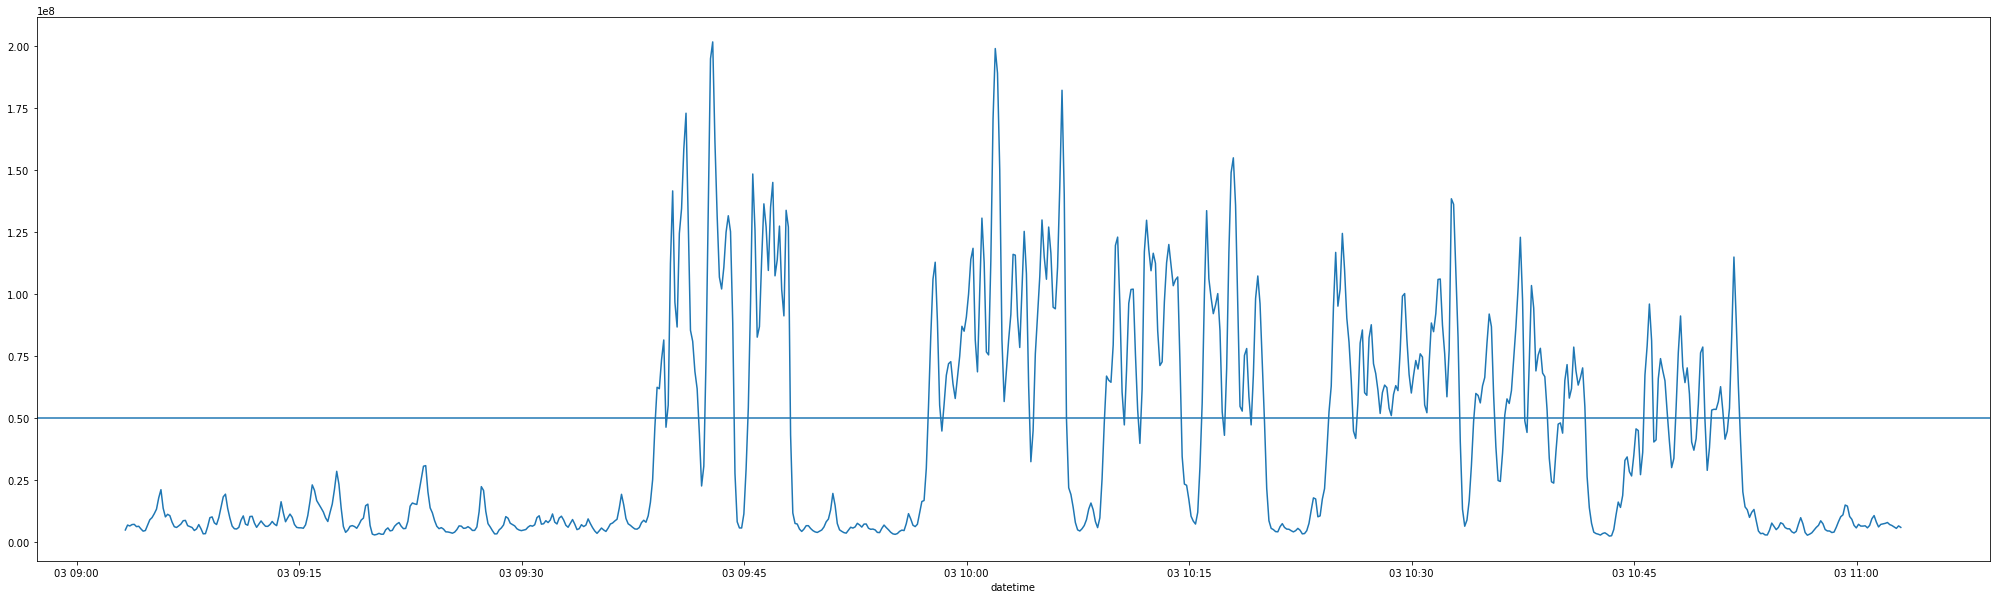

In [92]:
ax = kp.quick_lineplot(can1)
ax.axhline(0.5e8)

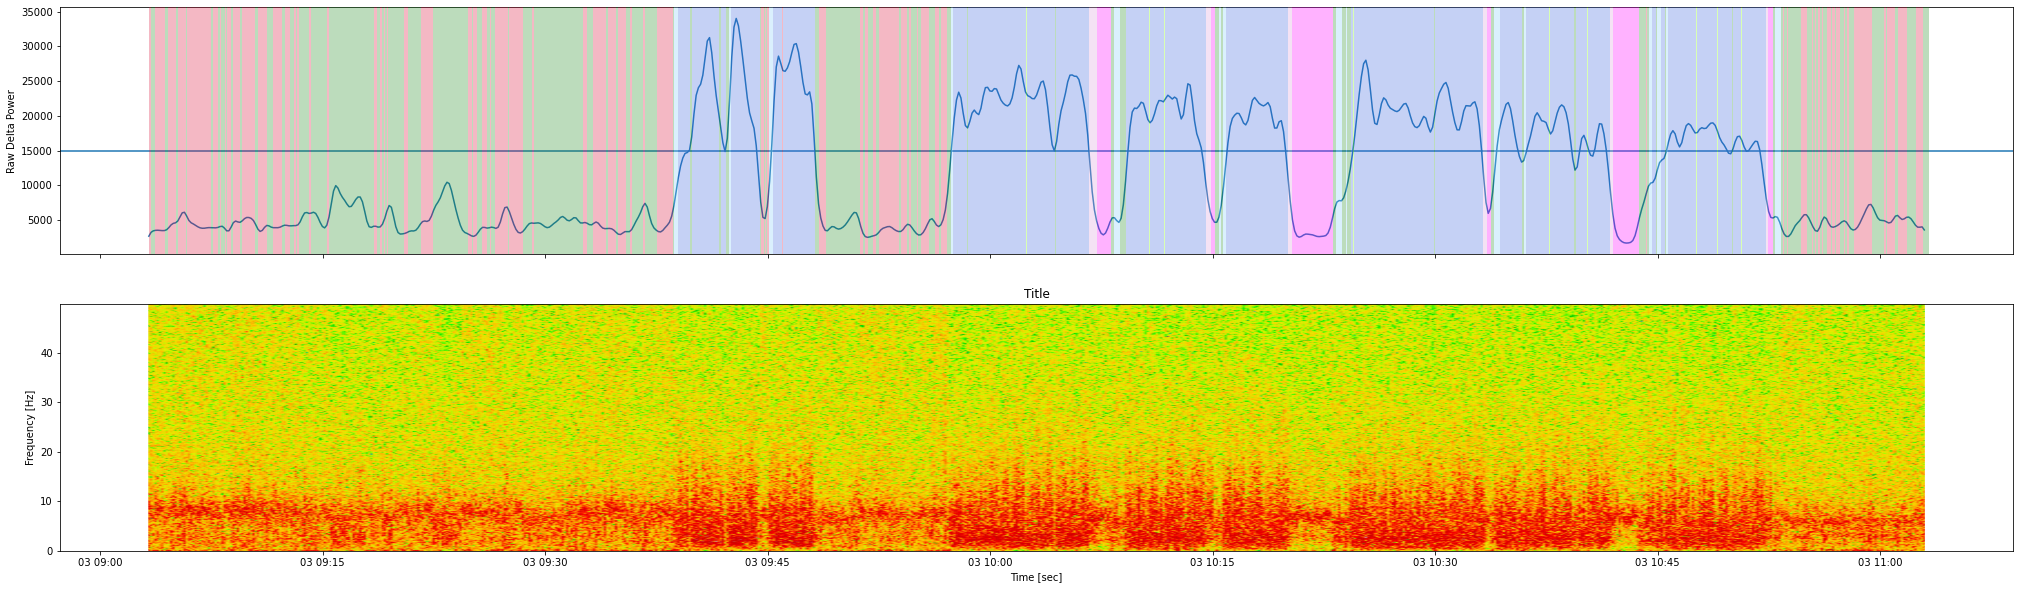

In [48]:
b, s = kp.plot_bp_and_spectro(espg, 2, ht, bp_def, 'delta')
b.axhline(15000)

## look for candidates systematically

In [120]:
data_path = '/Volumes/paxilline/Data/PAX_7/PAX_7_TANK/PAX_7-dmso-bl'
e, espg = kd.get_data_spg(data_path, store='EEGr', t1=0, t2=7200, channel=kd_ref['echans'], window_length=10, overlap=1)

read from t=0s to t=7502.02s
Using 1525.8789 Hz as SEV sampling rate for EEGr
Passing ValueError since sig already had a time dimension
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
Passing ValueError on dimension swap in get_data_spg


In [4]:
e2 = e.sel(channel=2)

In [ ]:
def get_spextrogram(sig, window_length=4, overlap=1, **kwargs):
    kwargs['nperseg'] = int(window_length * sig.fs) # window length in number of samples
    kwargs['noverlap'] = int(overlap * sig.fs) # overlap in number of samples
    spg = xrsig.parallel_spectrogram_welch(sig, **kwargs)
    return spg

In [5]:
p_2h = "/Volumes/paxilline/Data//paxilline_project_materials/PAX_7/hypnograms-PAX_7/hypno_dmso_BL1.txt"
ht = ssu.load_hypno(p_2h, e.datetime.values.min())

In [26]:
m, mspg = kd.get_data_spg(data_path, store='EMGr', t1=0, t2=7200, channel=[1,2], window_length=8, overlap=1)

read from t=0s to t=7502.02s
Passing ValueError since sig already had a time dimension
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
Passing ValueError on dimension swap in get_data_spg


In [29]:
omega = kd.get_bandpower(mspg, (300,700)).sel(channel=1)

In [7]:
test = {}
test['12_3_spg'] = kd.get_spextrogram(e, window_length=12, overlap=3).sel(channel=2)
test['10_0_spg'] = kd.get_spextrogram(e, window_length=10, overlap=0).sel(channel=2)
test['10_1_spg'] = kd.get_spextrogram(e, window_length=10, overlap=1).sel(channel=2)
test['10_5_spg'] = kd.get_spextrogram(e, window_length=10, overlap=5).sel(channel=2)
test['8_1_spg'] = kd.get_spextrogram(e, window_length=8, overlap=1).sel(channel=2)
test['7_0_spg'] = kd.get_spextrogram(e, window_length=7, overlap=0).sel(channel=2)
test['7_1_spg'] = kd.get_spextrogram(e, window_length=7, overlap=1).sel(channel=2)
test['7_3_spg'] = kd.get_spextrogram(e, window_length=7, overlap=3).sel(channel=2)
test['5_0_spg'] = kd.get_spextrogram(e, window_length=5, overlap=0).sel(channel=2)
test['5_2_spg'] = kd.get_spextrogram(e, window_length=5, overlap=2).sel(channel=2)
test['4_1_spg'] = kd.get_spextrogram(e, window_length=4, overlap=1).sel(channel=2)
test['3_0_spg'] = kd.get_spextrogram(e, window_length=3, overlap=0).sel(channel=2)
test['3_1_spg'] = kd.get_spextrogram(e, window_length=3, overlap=1).sel(channel=2)
test['2_0_spg'] = kd.get_spextrogram(e, window_length=2, overlap=0).sel(channel=2)
test['2_q_spg'] = kd.get_spextrogram(e, window_length=2, overlap=0.25).sel(channel=2)
test['1_0_spg'] = kd.get_spextrogram(e, window_length=1, overlap=0).sel(channel=2)
test['1_t_spg'] = kd.get_spextrogram(e, window_length=1, overlap=0.1).sel(channel=2)

In [8]:
test['4_.5_spg'] = kd.get_spextrogram(e, window_length=4, overlap=0.5).sel(channel=2)

In [18]:
def can_plotter(spg, band=(0.5, 4), hyp=ht):
    f, ax = plt.subplots(figsize=(30, 6))
    delta_raw = kd.get_bandpower(spg, band)
    ax = sns.lineplot(x=delta_raw.datetime, y=delta_raw.values, ax=ax)
    kp.shade_hypno_for_me(hyp, ax=ax)
    return ax

In [19]:
def can_plotter2(spg, ss, band=(0.5, 4), hyp=ht):
    f, ax = plt.subplots(figsize=(30, 5))
    delta_raw = kd.get_bandpower(spg, band)
    delta_smooth = kd.get_smoothed_da(delta_raw, smoothing_sigma=ss)
    ax = sns.lineplot(x=delta_smooth.datetime, y=delta_smooth.values, ax=ax)
    kp.shade_hypno_for_me(hyp, ax=ax)
    return ax

In [43]:
def can_plotter3(spg, ss, band1=(0.5, 4), band2=(11,16), hyp=ht, emg=None):
    f, ax = plt.subplots(figsize=(30, 5))
    delta_raw = kd.get_bandpower(spg, band1)
    delta_smooth = kd.get_smoothed_da(delta_raw, smoothing_sigma=ss)
    sigma_raw = kd.get_bandpower(spg, band2)
    sigma_smooth = kd.get_smoothed_da(sigma_raw, smoothing_sigma=ss)
    
    combo = (delta_smooth * sigma_smooth)
    
    if emg is not None:
        combo_emg = combo/emg.values
        ax = sns.lineplot(x=combo_emg.datetime, y=combo_emg.values, ax=ax)
        kp.shade_hypno_for_me(hyp, ax=ax)
    else:
        ax = sns.lineplot(x=combo.datetime, y=combo.values, ax=ax)
        kp.shade_hypno_for_me(hyp, ax=ax)
    return ax

In [21]:
def can_plotter_hist(spg, ss, band=(0.5, 4)):
    f, ax = plt.subplots(figsize=(10, 10))
    delta_raw = kd.get_bandpower(spg, band)
    delta_smooth = kd.get_smoothed_da(delta_raw, smoothing_sigma=ss)
    ax = sns.histplot(data=delta_smooth.values, ax=ax)
    return ax

In [45]:
def can_plotter_hist2(spg, ss, band1=(0.5, 4), band2=(11,16), emg=None):
    f, ax = plt.subplots(figsize=(10, 10))
    delta_raw = kd.get_bandpower(spg, band1)
    delta_smooth = kd.get_smoothed_da(delta_raw, smoothing_sigma=ss)
    sigma_raw = kd.get_bandpower(spg, band2)
    sigma_smooth = kd.get_smoothed_da(sigma_raw, smoothing_sigma=ss)
    
    combo = (delta_smooth * sigma_smooth)
    
    if emg is not None:
        combo_emg = combo/emg.values
        ax = sns.histplot(data=combo_emg.values, ax=ax)
    else:
        ax = sns.histplot(data=combo.values, ax=ax)
    return ax

In [12]:
kl = kd.get_key_list(test)

In [13]:
sigmas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

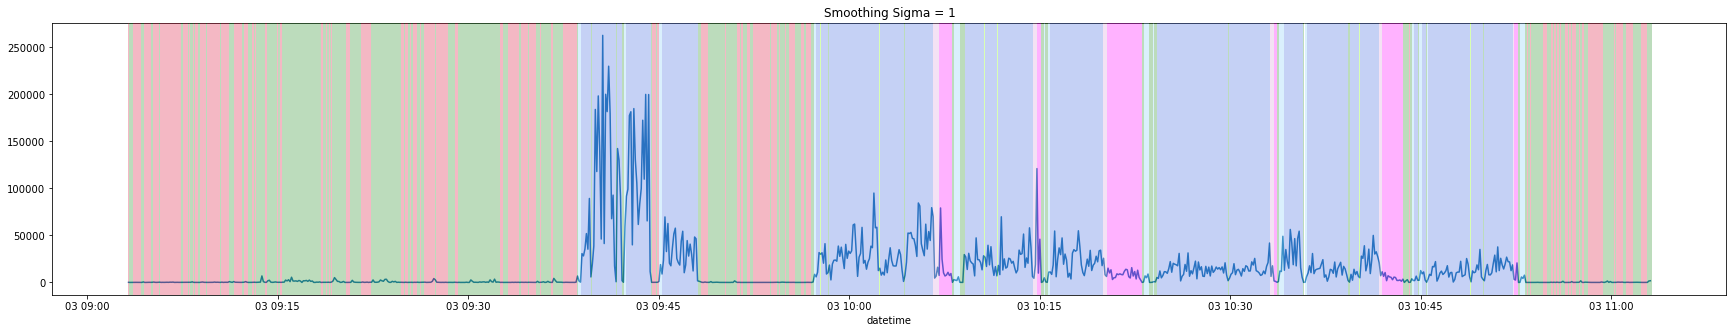

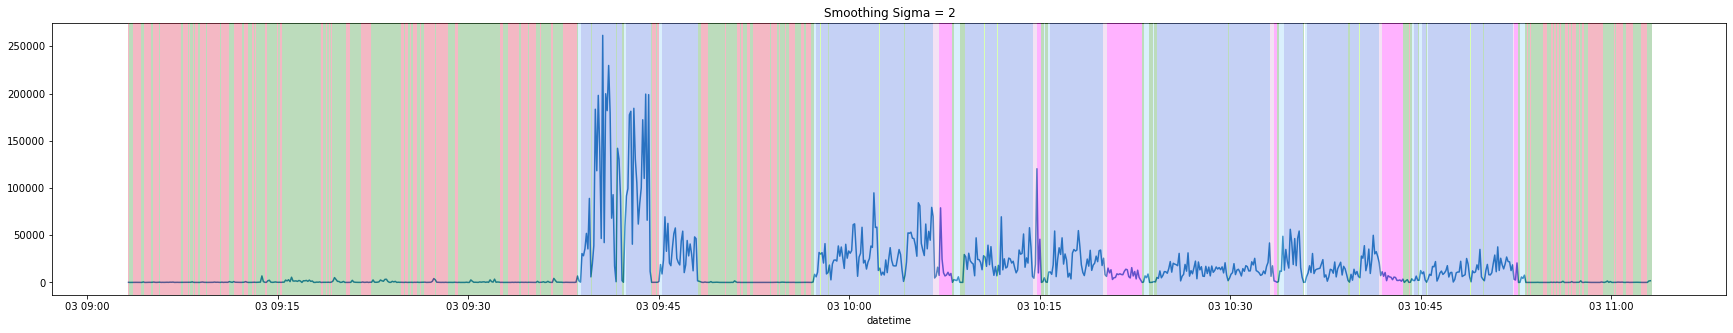

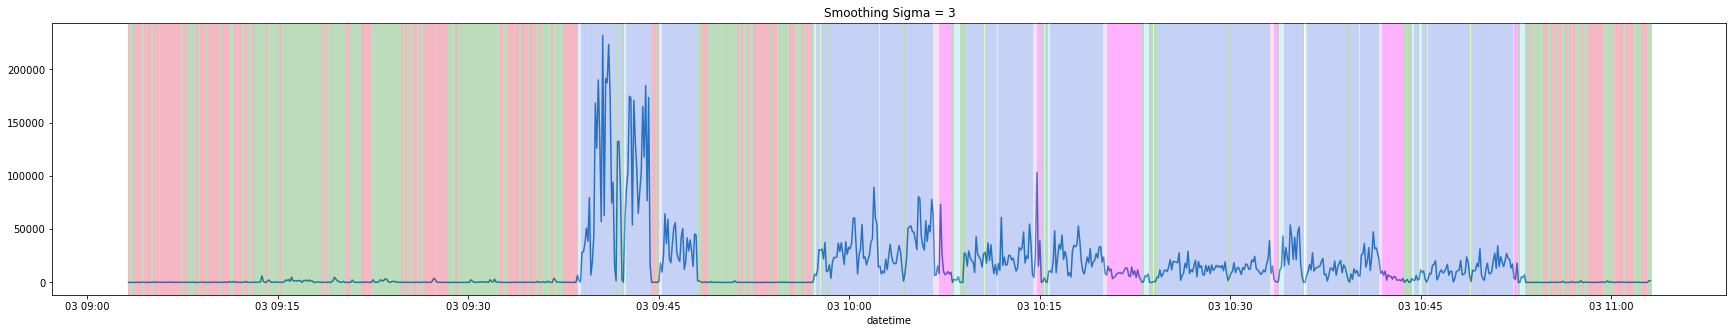

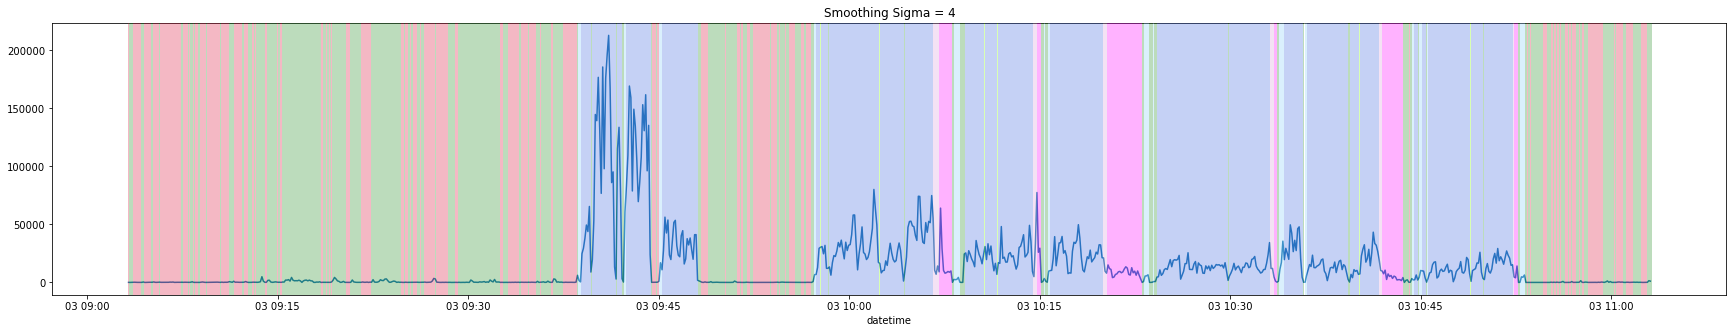

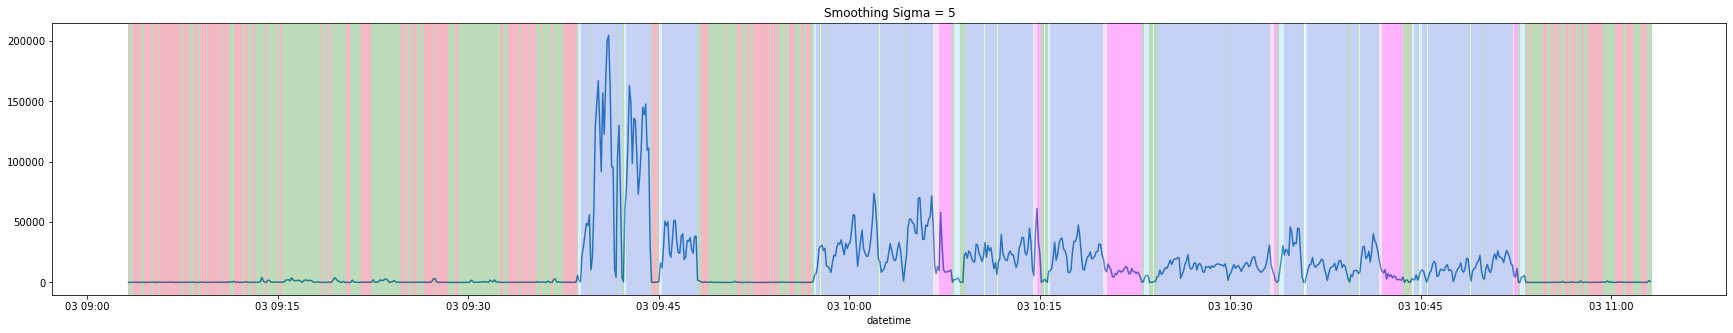

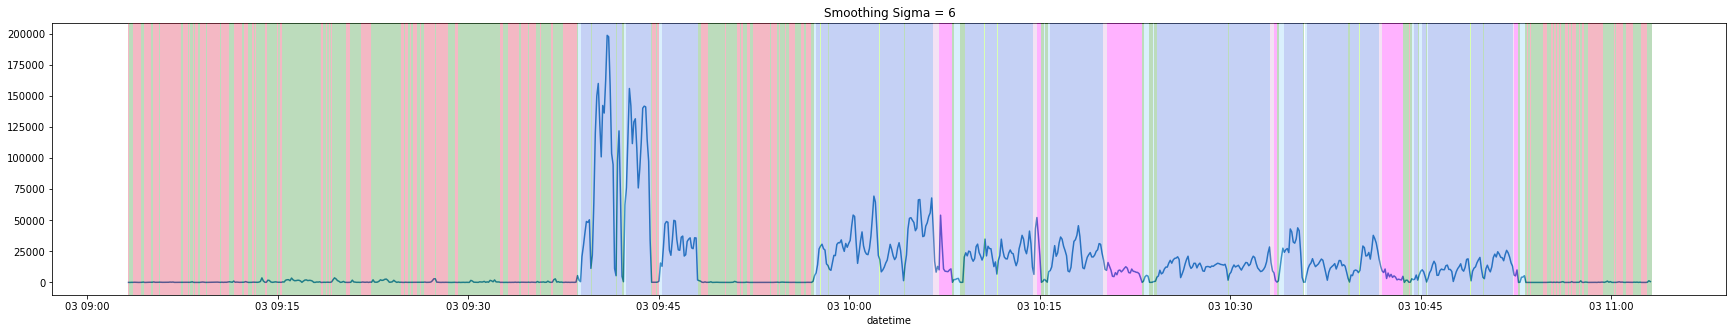

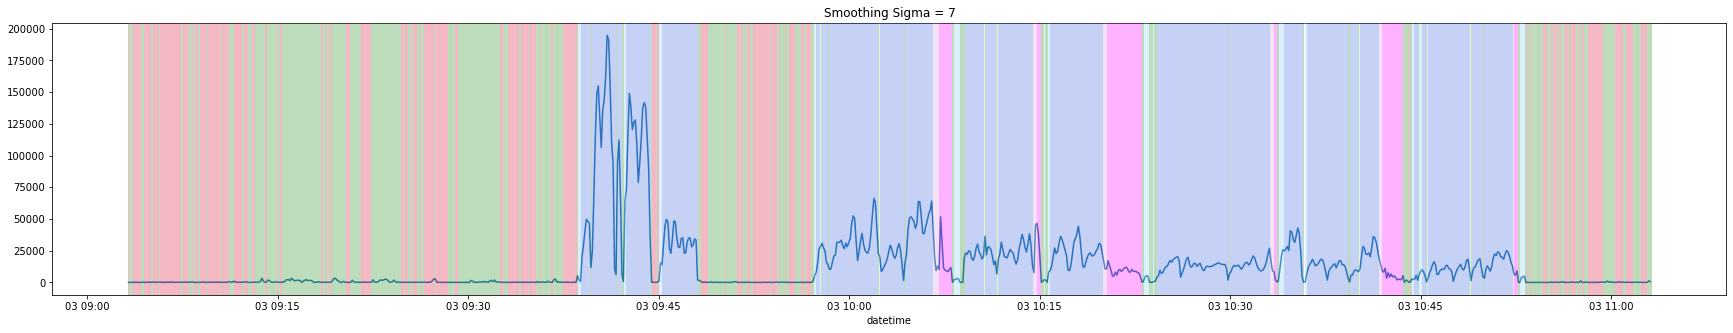

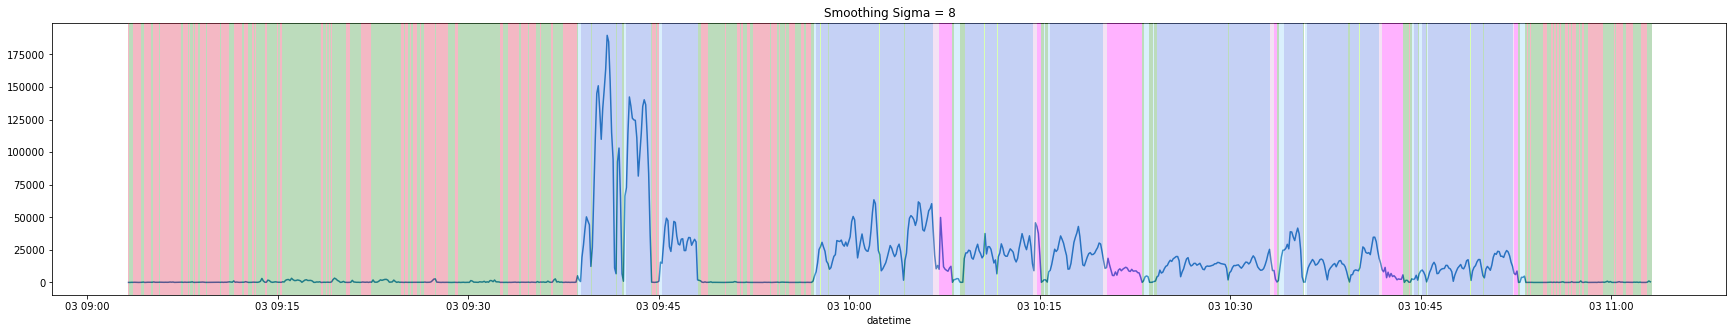

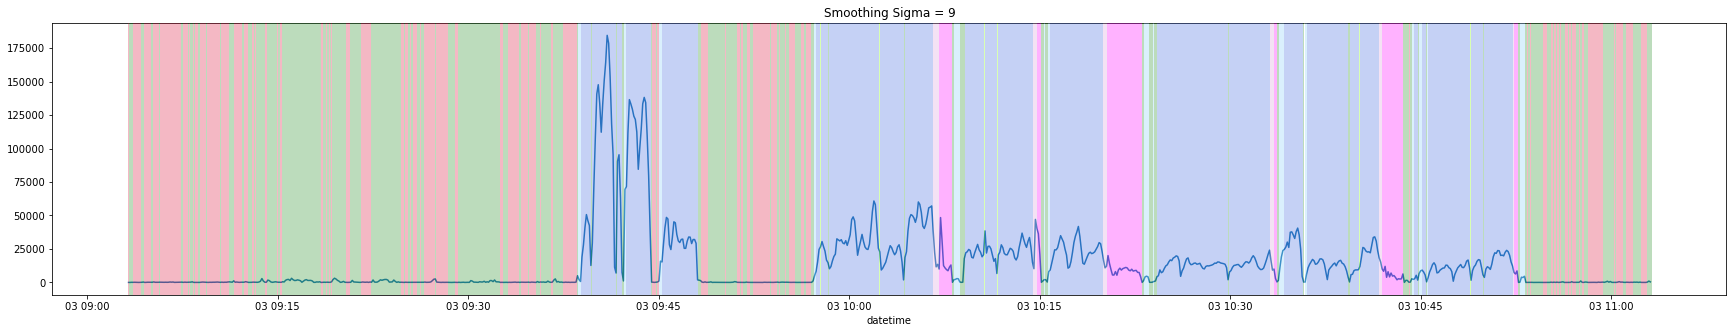

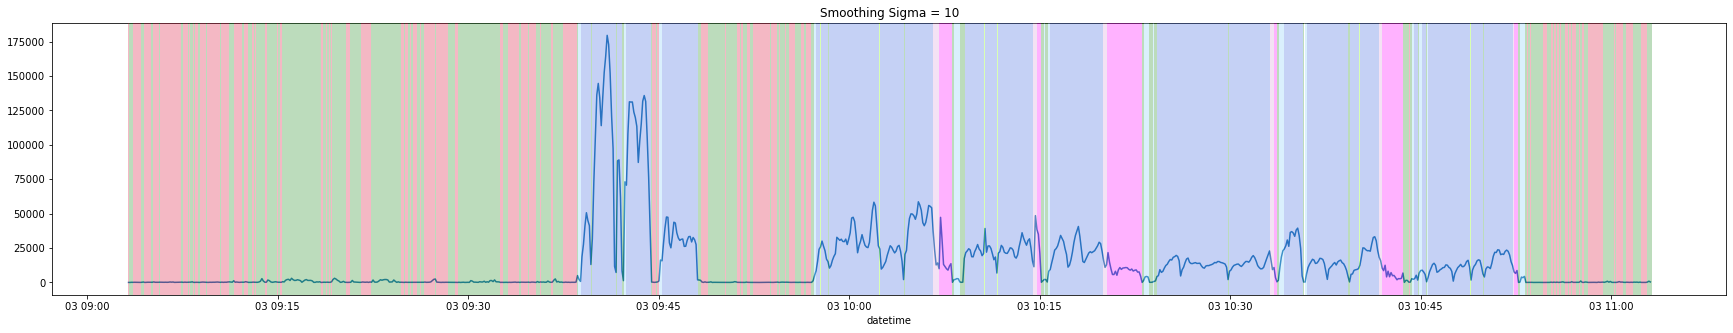

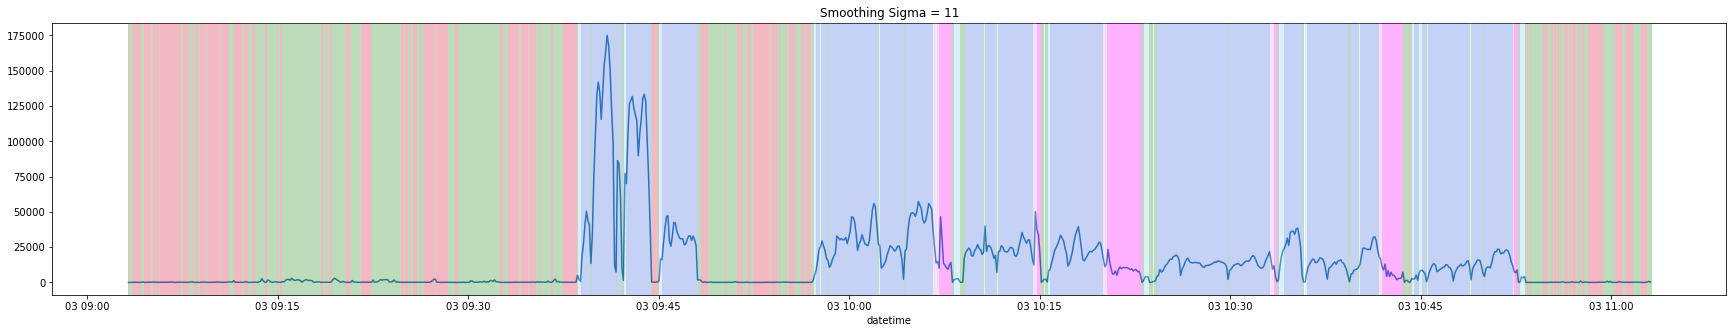

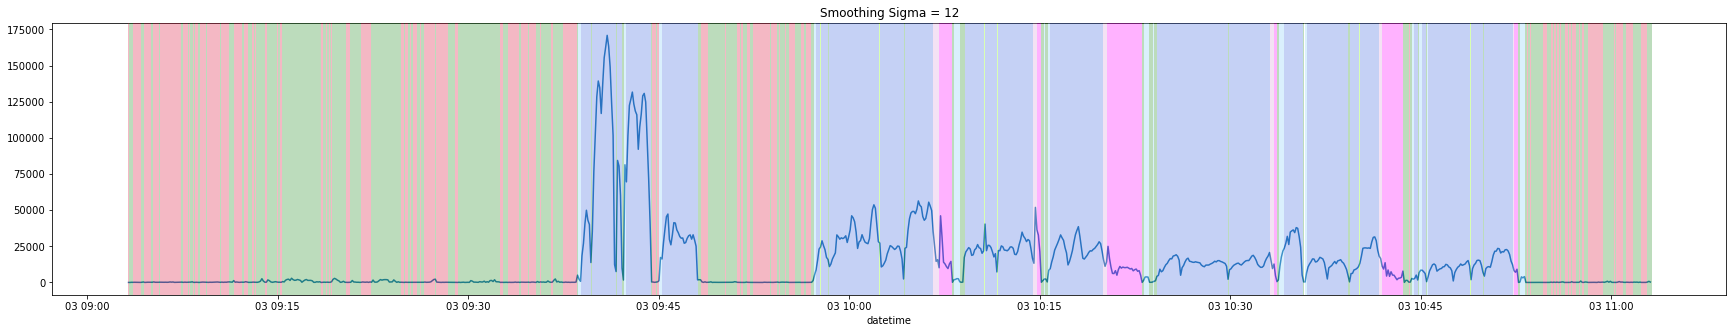

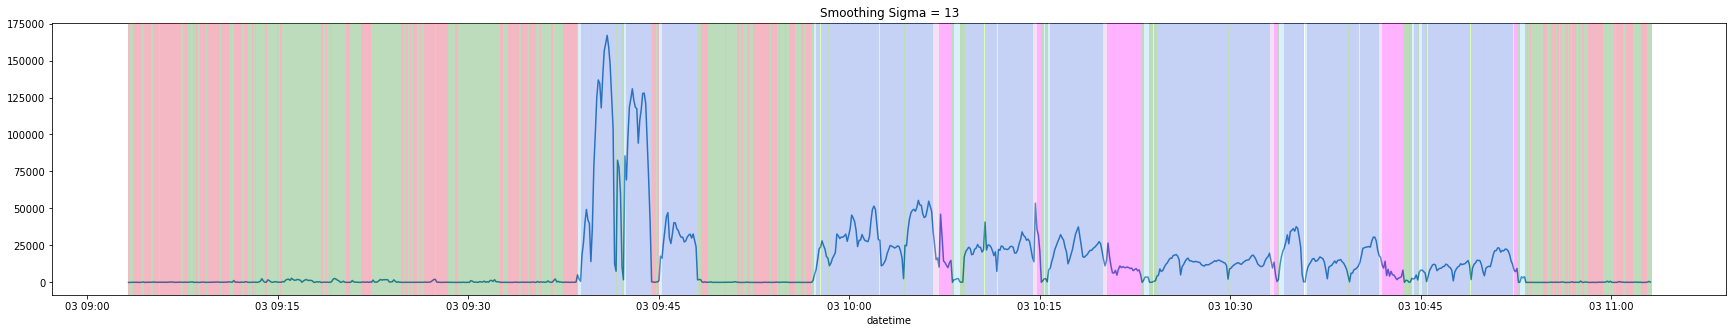

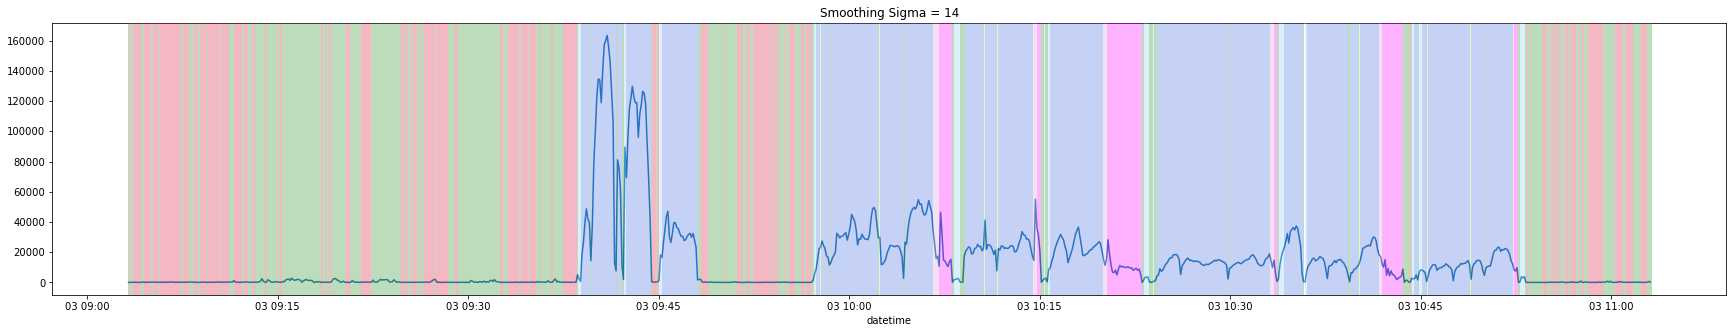

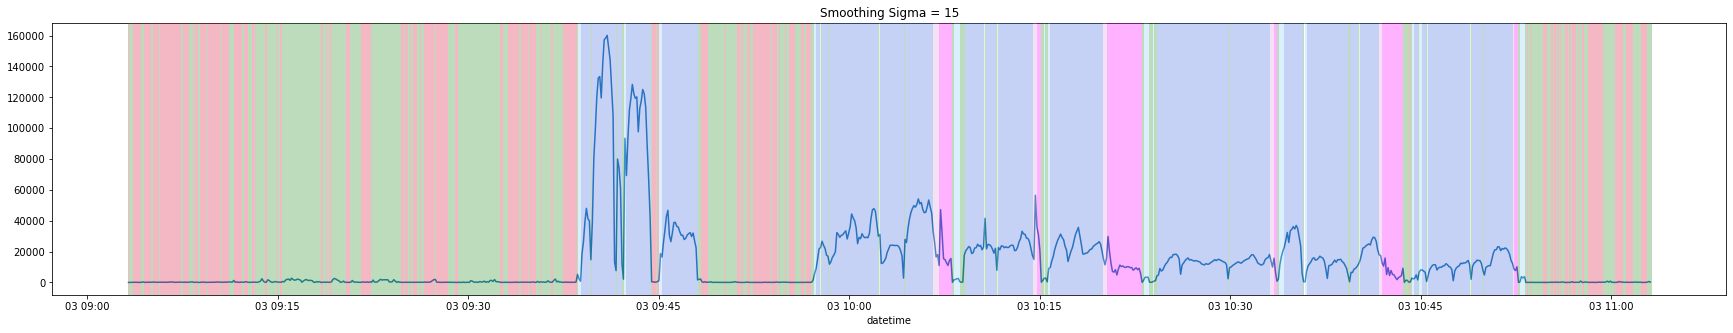

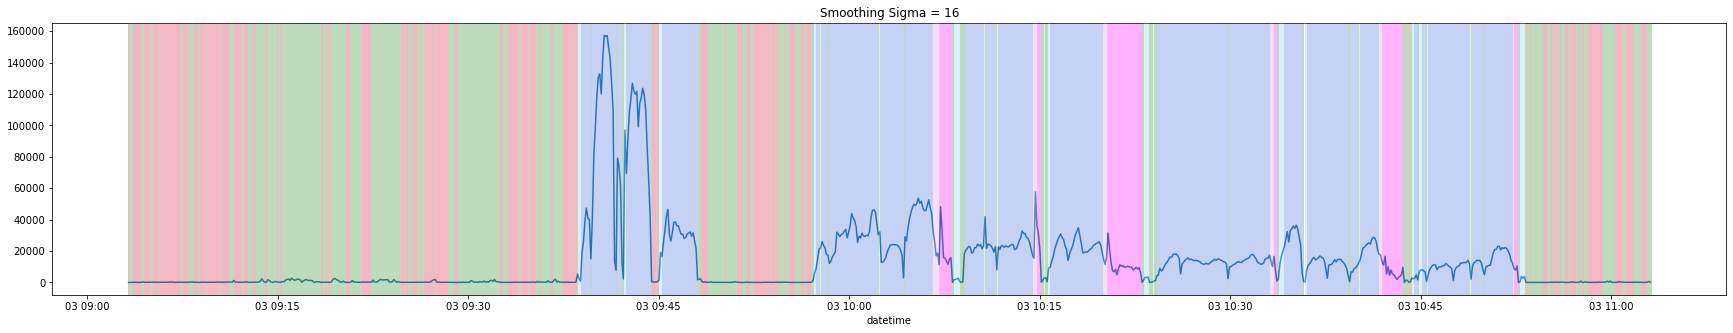

In [44]:
for s in sigmas:
    ax = can_plotter3(test['8_1_spg'], ss=s, emg=omega)
    ax.set_title("Smoothing Sigma = " + str(s))

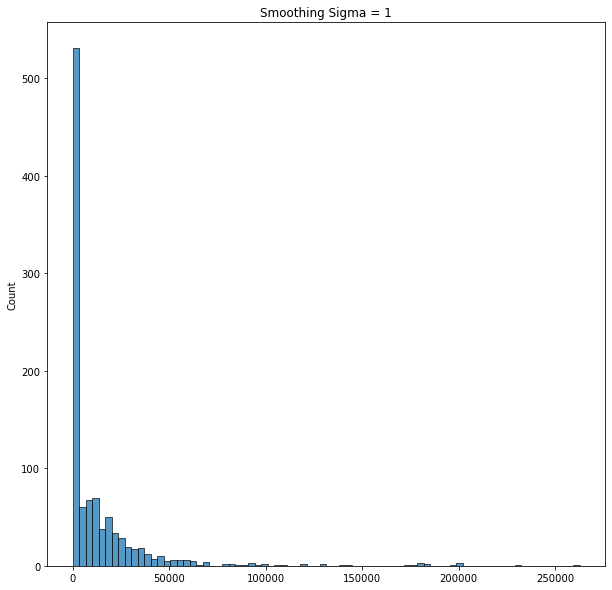

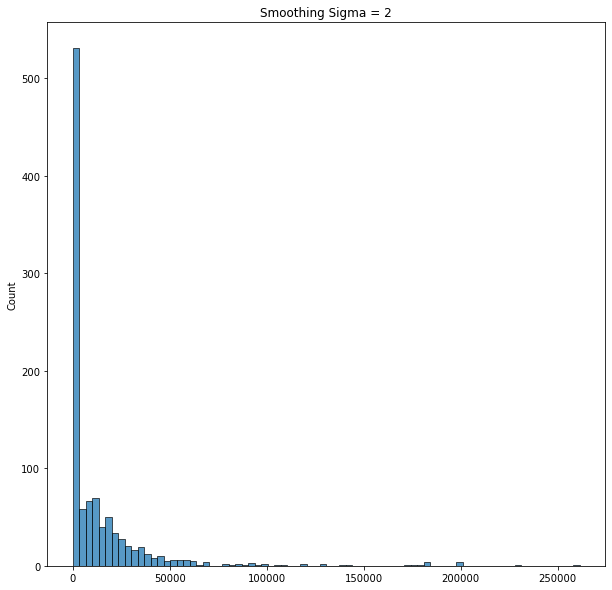

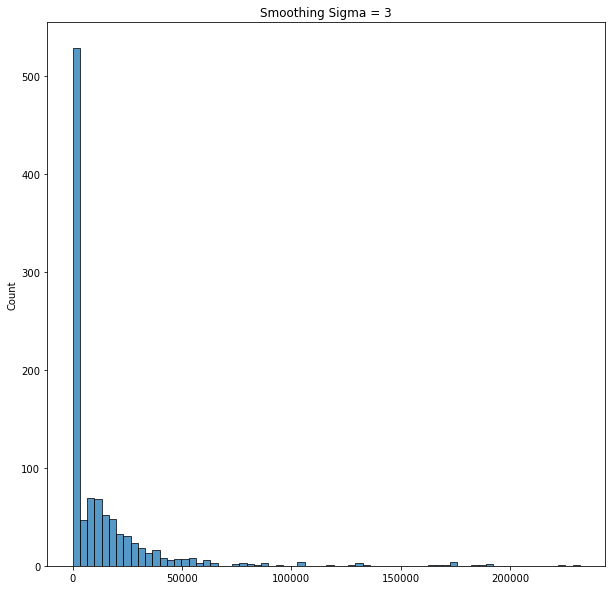

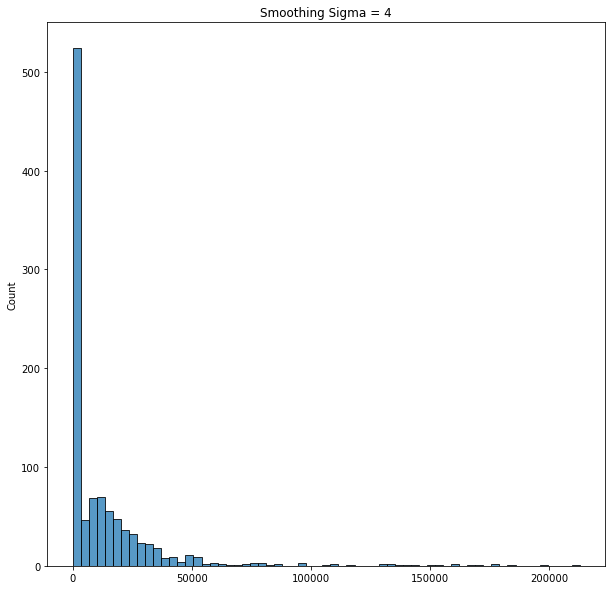

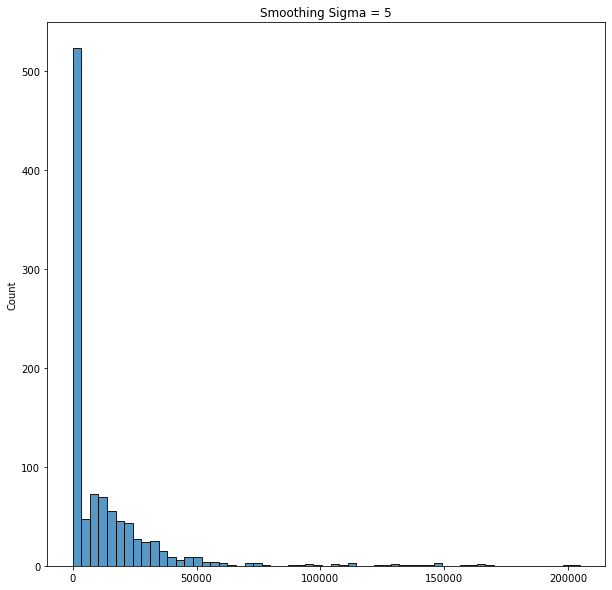

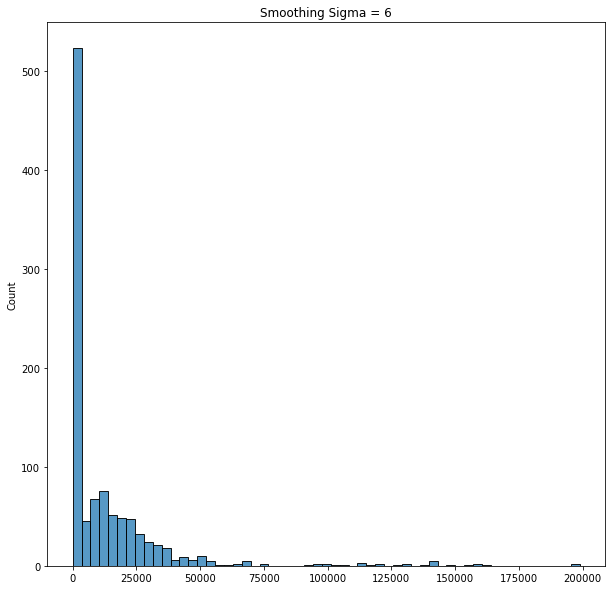

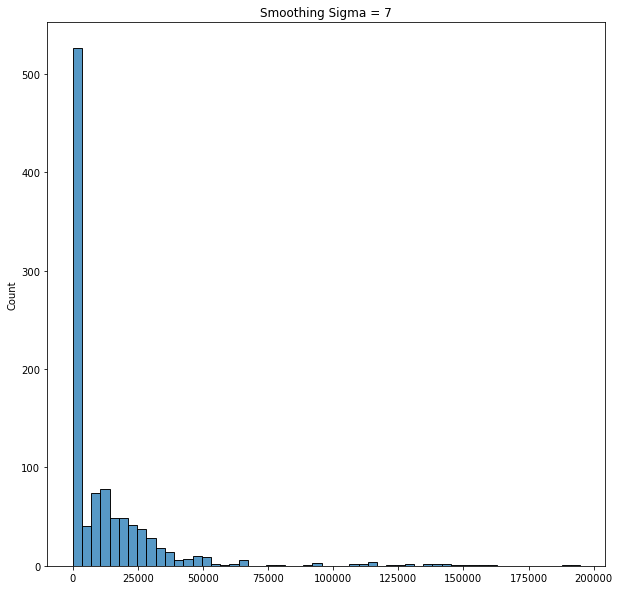

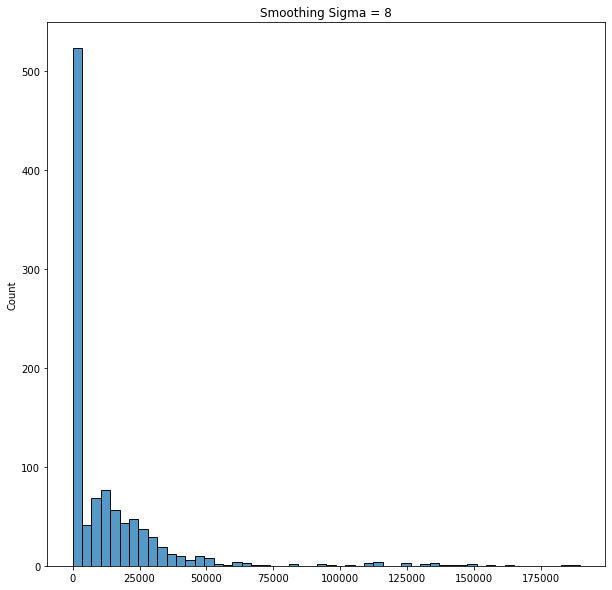

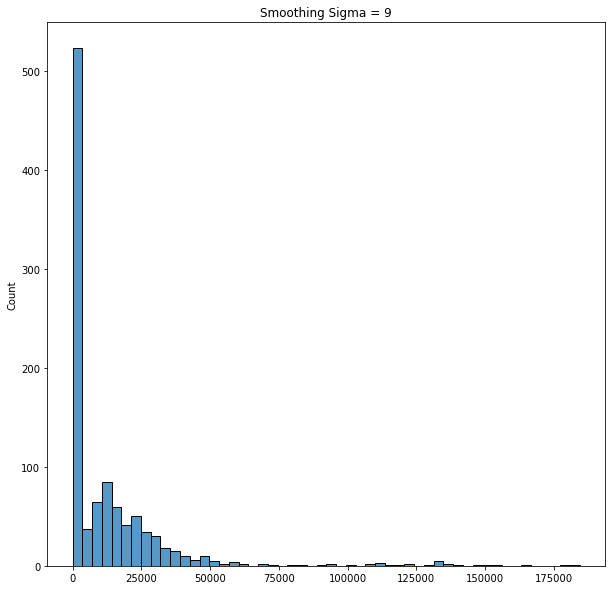

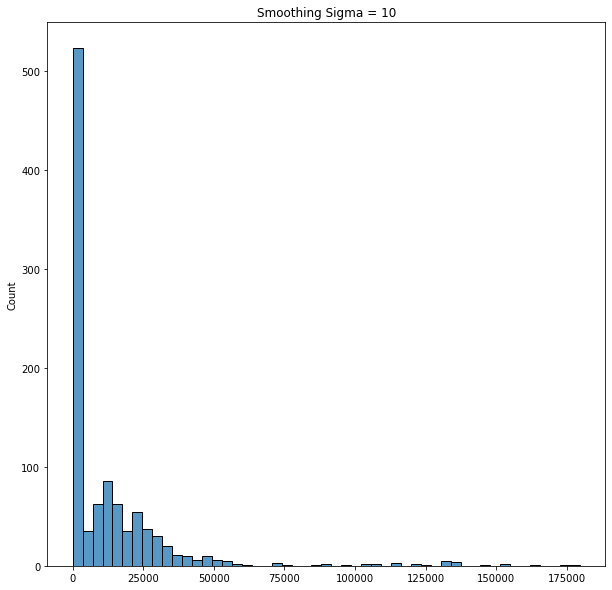

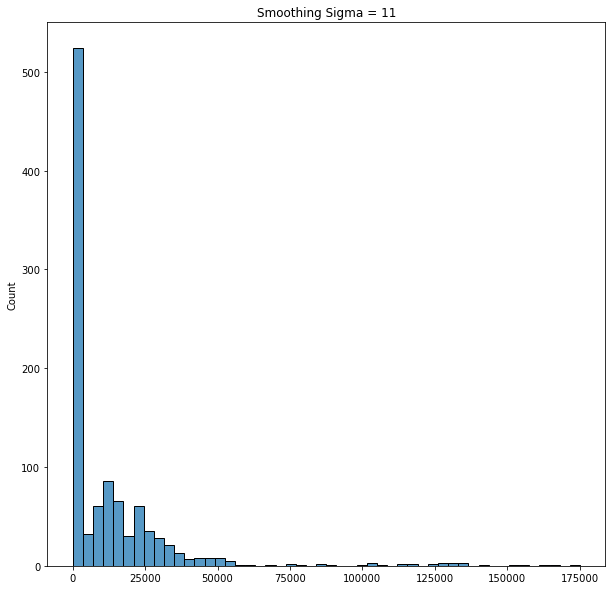

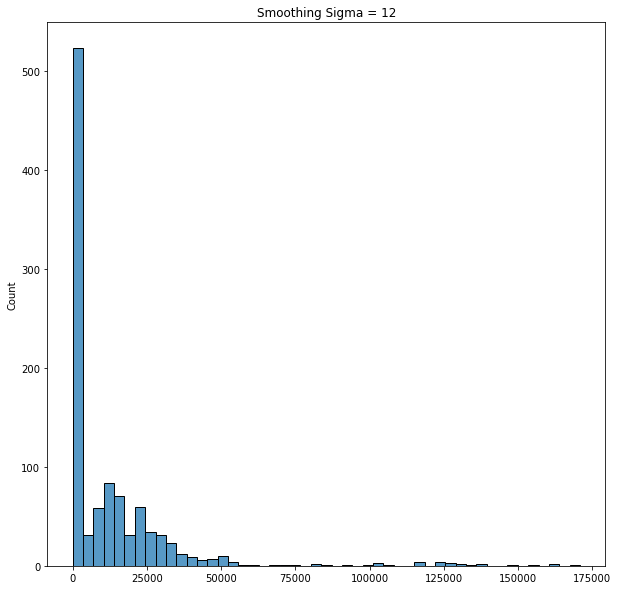

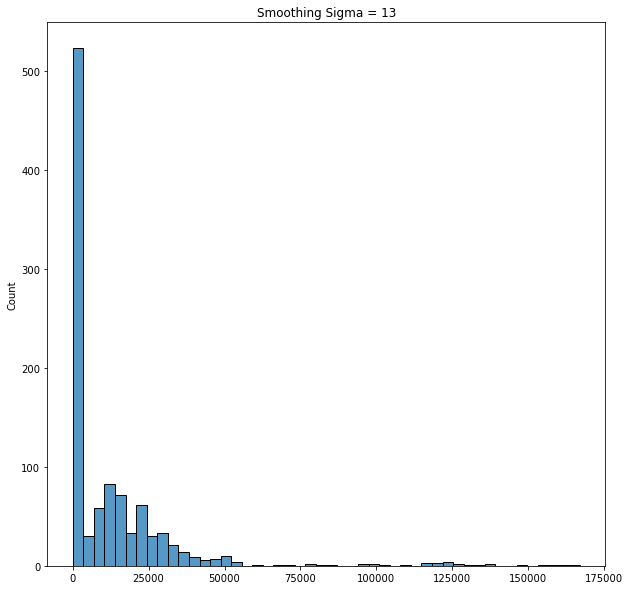

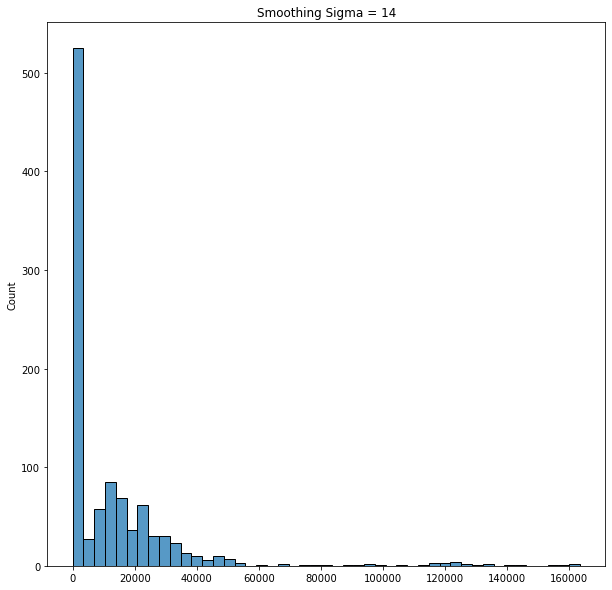

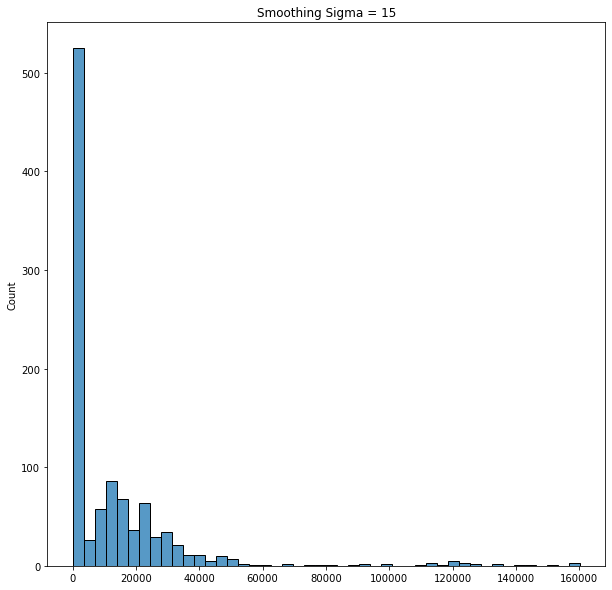

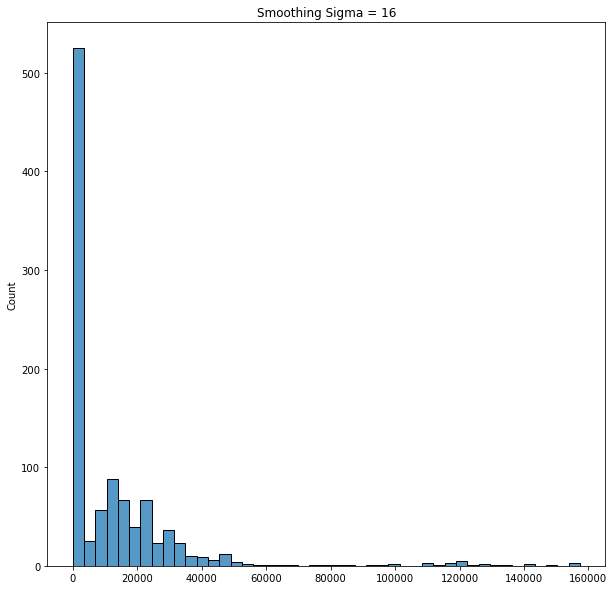

In [47]:
for s in sigmas:
    ax = can_plotter_hist2(test['8_1_spg'], ss=s, emg=omega)
    ax.set_title('Smoothing Sigma = ' + str(s))

## Assess SSFM-V2

In [33]:
spg_4_1.sel(channel=2)

<xarray.DataArray (frequency: 3052, datetime: 2399)>
array([[2.0115151e+00, 1.5027864e+02, 1.5175453e+01, ..., 6.1311841e-01,
        3.1161558e+01, 3.8293633e+00],
       [1.1555495e+01, 2.8693082e+02, 7.0345749e+01, ..., 3.2317375e+01,
        4.6650162e+01, 5.5743607e+01],
       [1.5241667e+02, 1.5200015e+02, 2.5334639e+02, ..., 1.7280807e+02,
        2.7022296e+02, 5.8805695e+01],
       ...,
       [3.3133965e-02, 2.6719761e-01, 9.5429413e-02, ..., 1.2883767e-02,
        4.0068290e-01, 9.5279038e-01],
       [2.4602467e-01, 2.4785641e-01, 3.8243735e-01, ..., 8.3324447e-02,
        2.9172701e-01, 2.1065365e-01],
       [1.8929212e-01, 4.1490340e-01, 3.3819437e-01, ..., 3.4517494e-01,
        2.9273024e-03, 3.2513788e-01]], dtype=float32)
Coordinates:
  * frequency  (frequency) float64 0.0 0.25 0.5 0.7501 ... 762.3 762.6 762.8
    time       (datetime) float64 2.0 5.0 8.0 ... 7.191e+03 7.194e+03 7.197e+03
    channel    int64 2
    timedelta  (datetime) timedelta64[ns] 00:00:01.999831040 ... 01:59:56.570...
  * datetime   (datetime) datetime64[ns] 2021-11-03T09:03:13.999830040 ... 20...
Attributes:
    units:    uV^2/Hz

Passing Channel Selection Error, Data Already Contains Single Channel


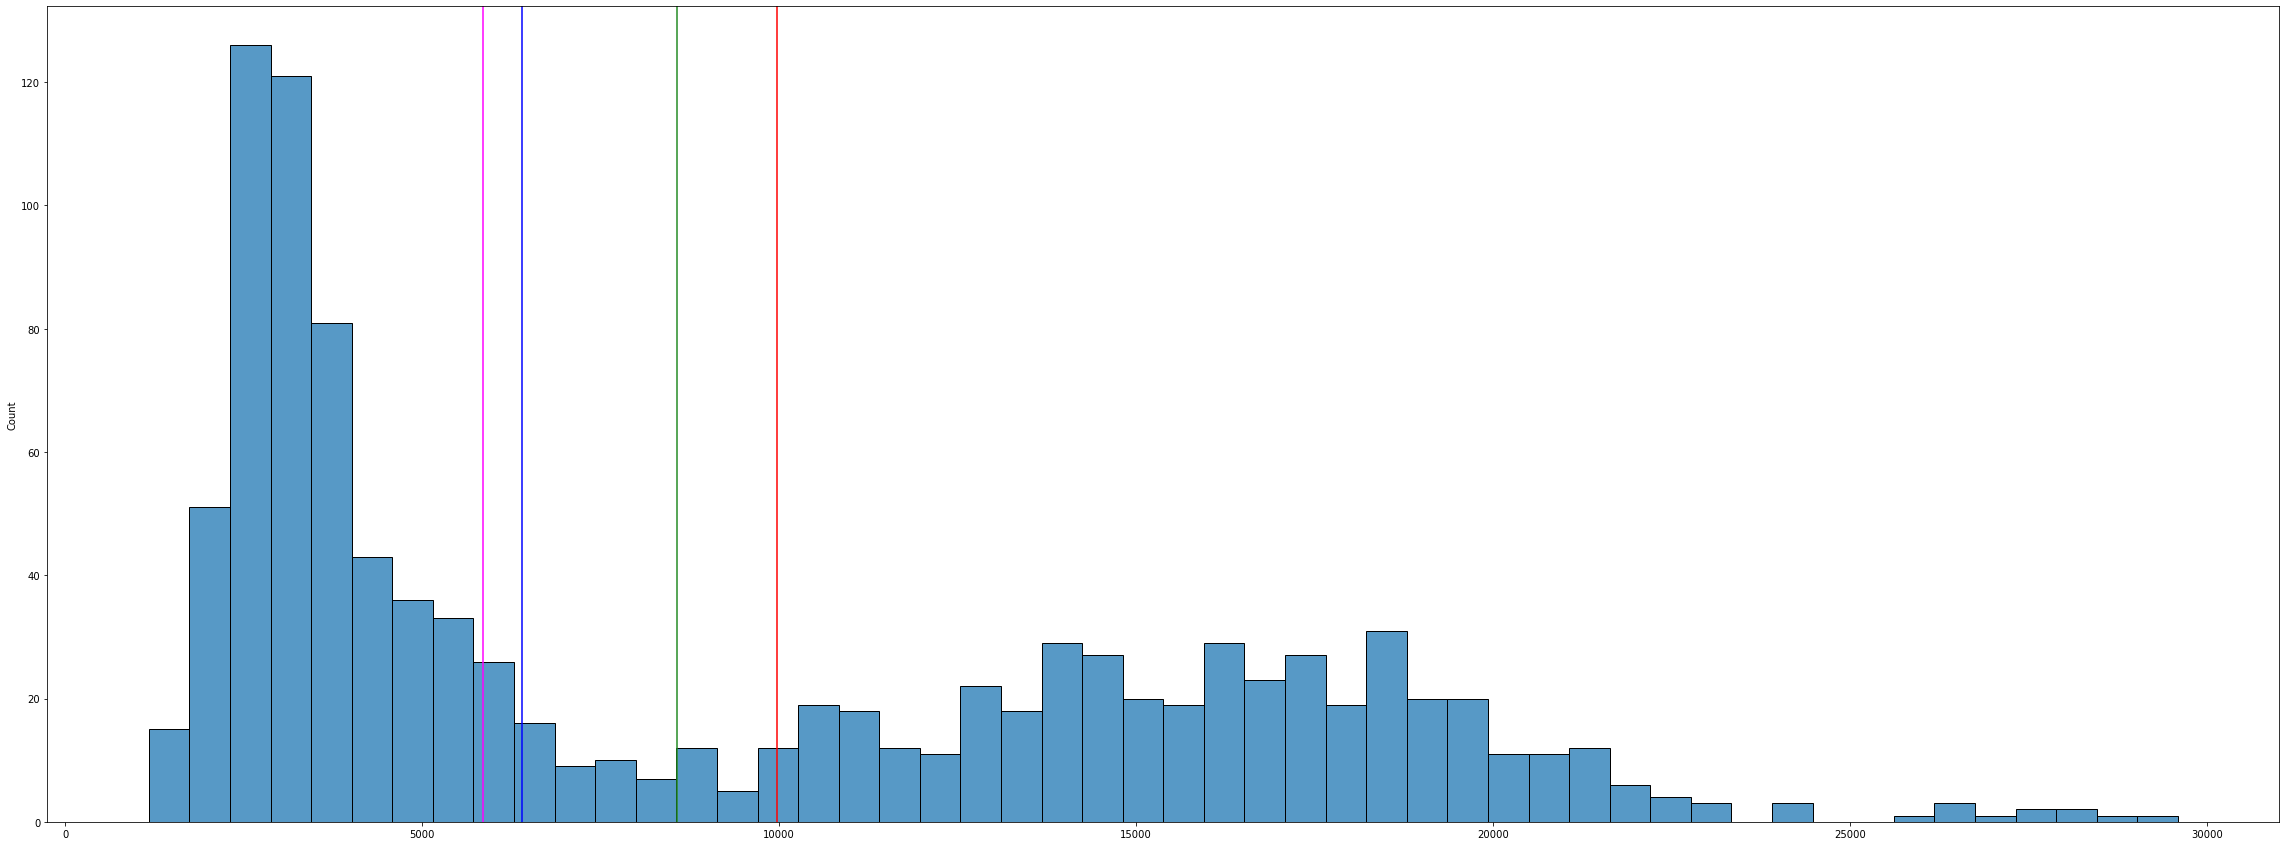

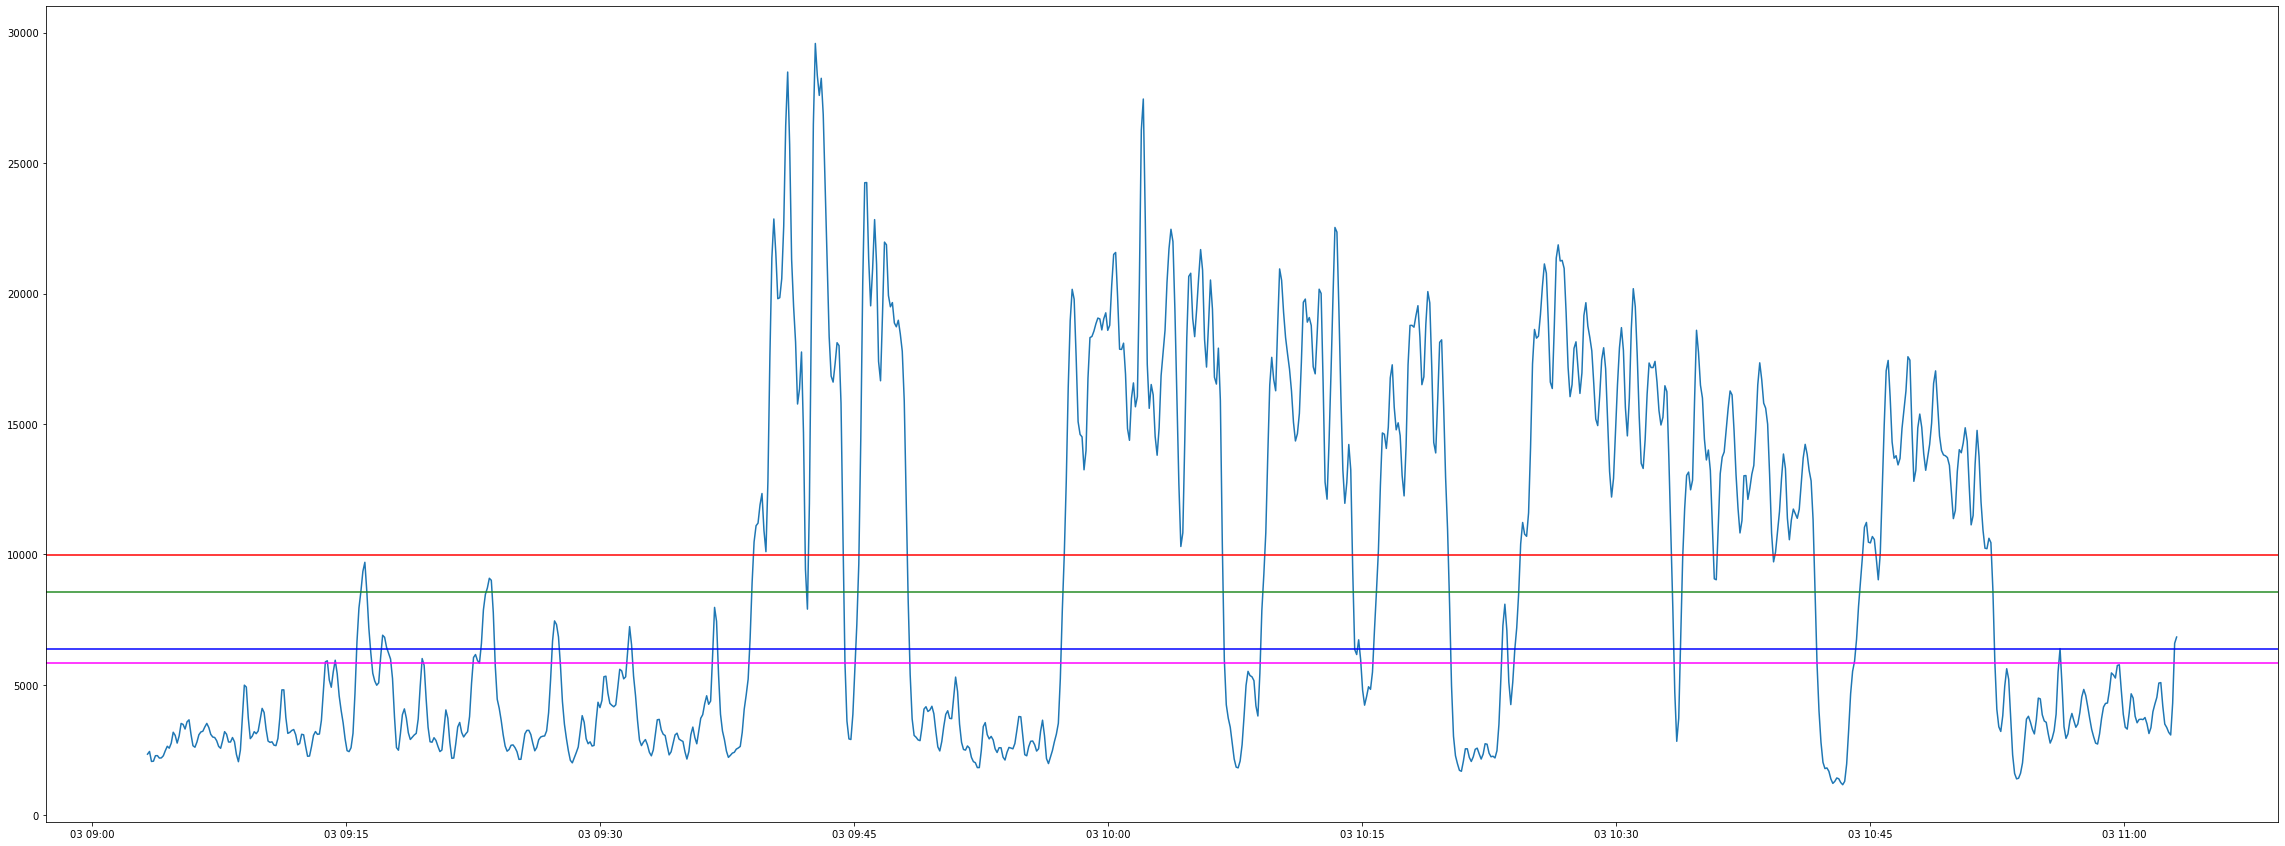

Violet --> 50
Blue --> 52
Green --> 56
Red --> 58


Enter NREM Threshold:  60


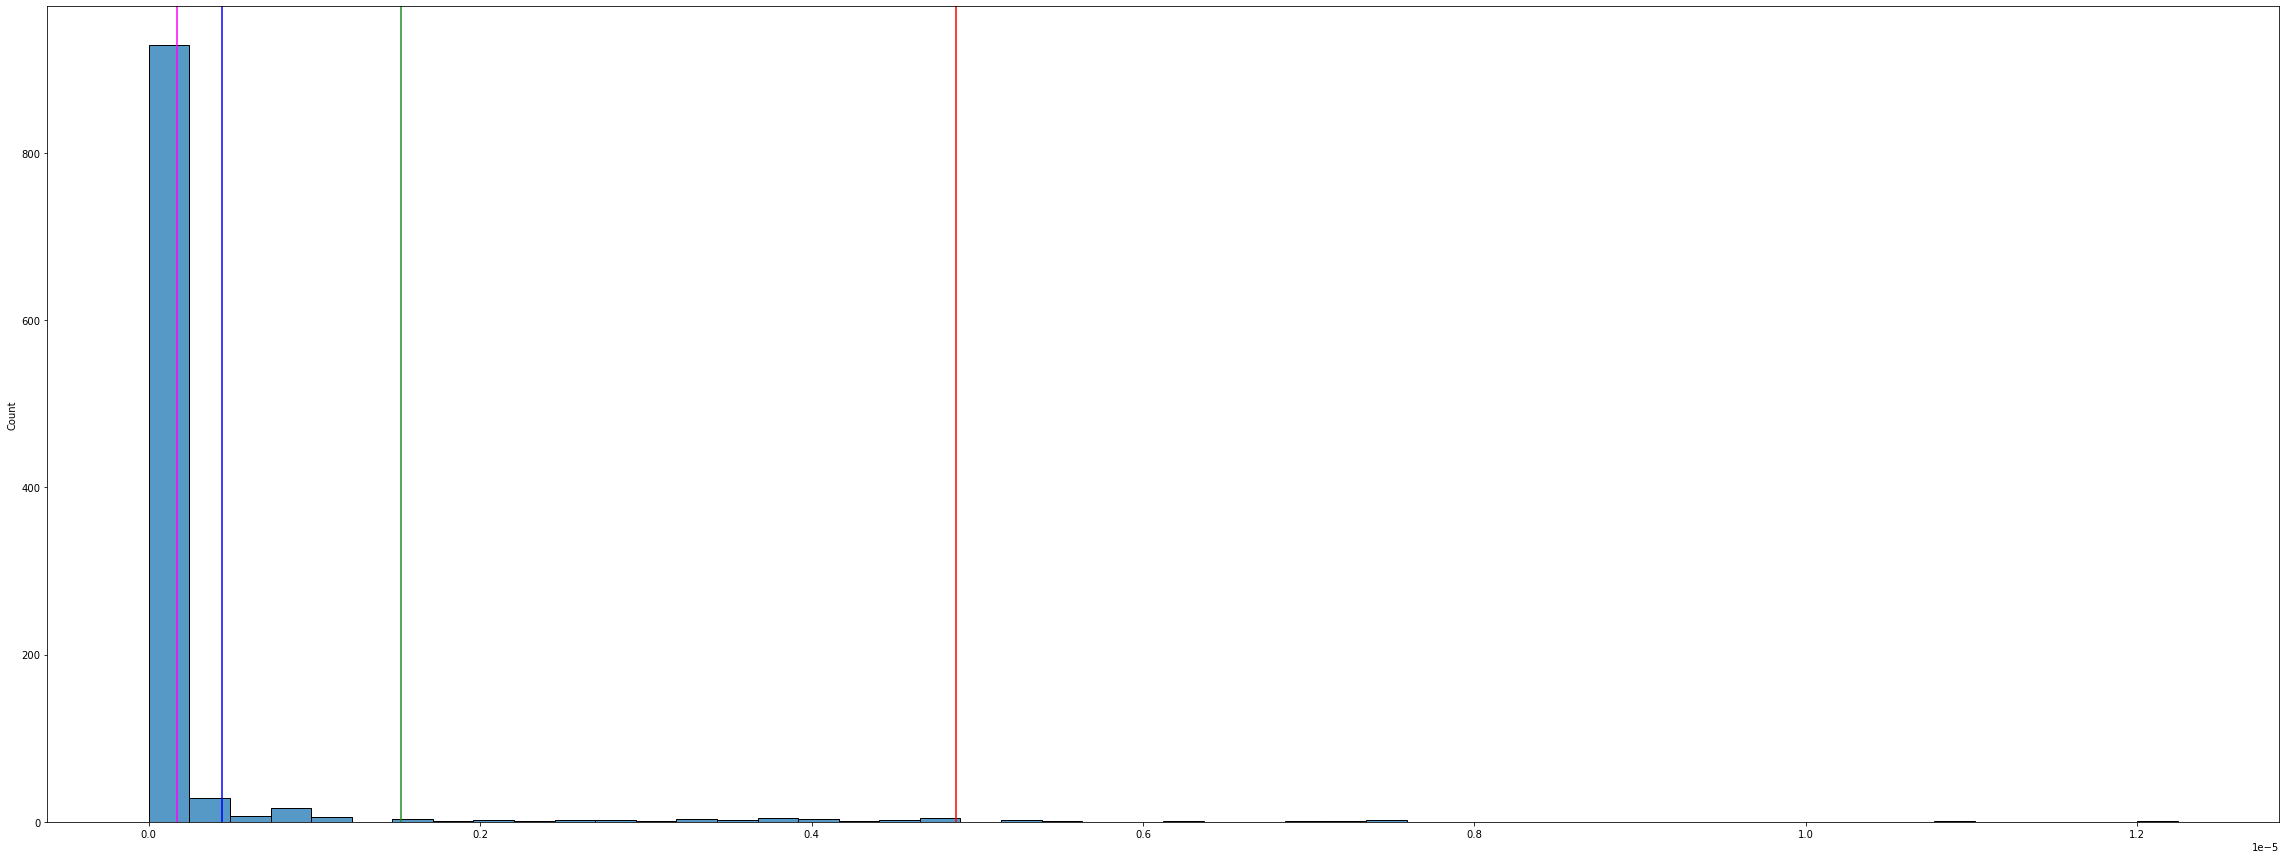

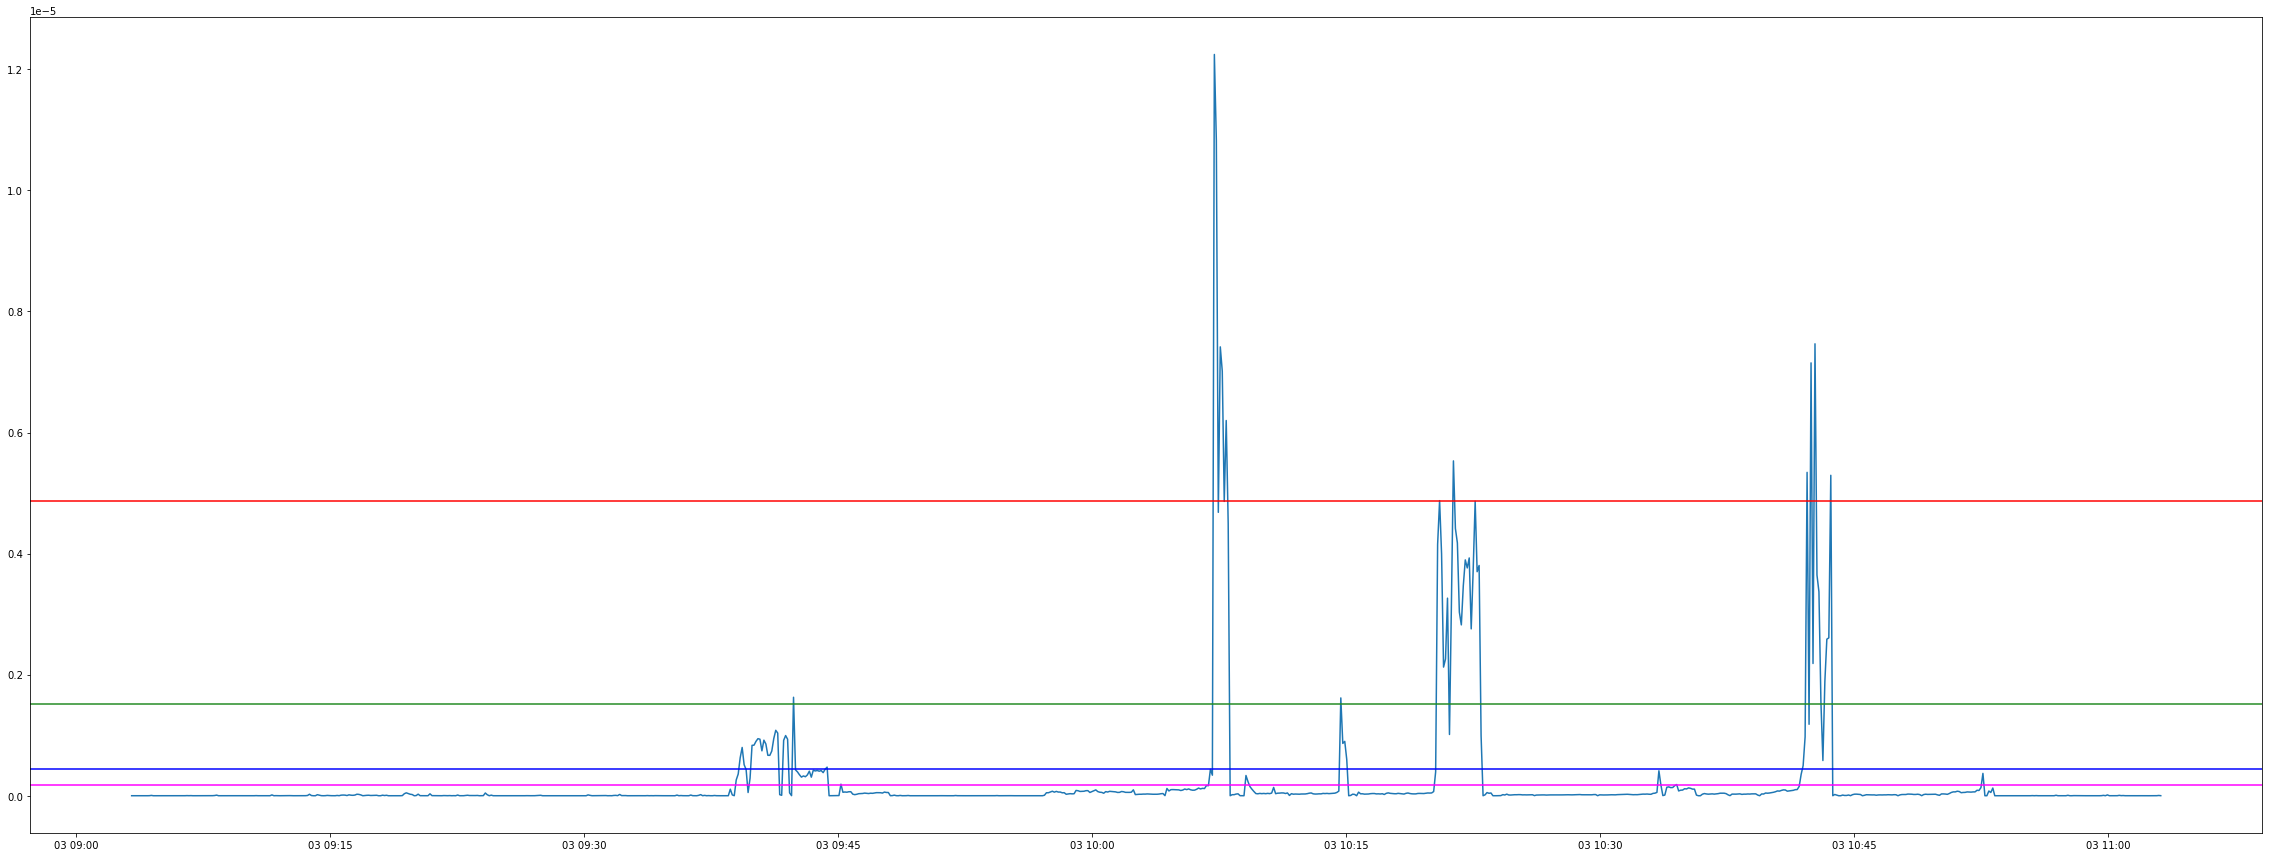

Violet --> 90
Blue --> 93
Green --> 96
Red --> 99


Enter REM Threshold:  93


passing indexing error
passing indexing error
passing indexing error
channel already selected, passing key error (plot_hypno_for_me)


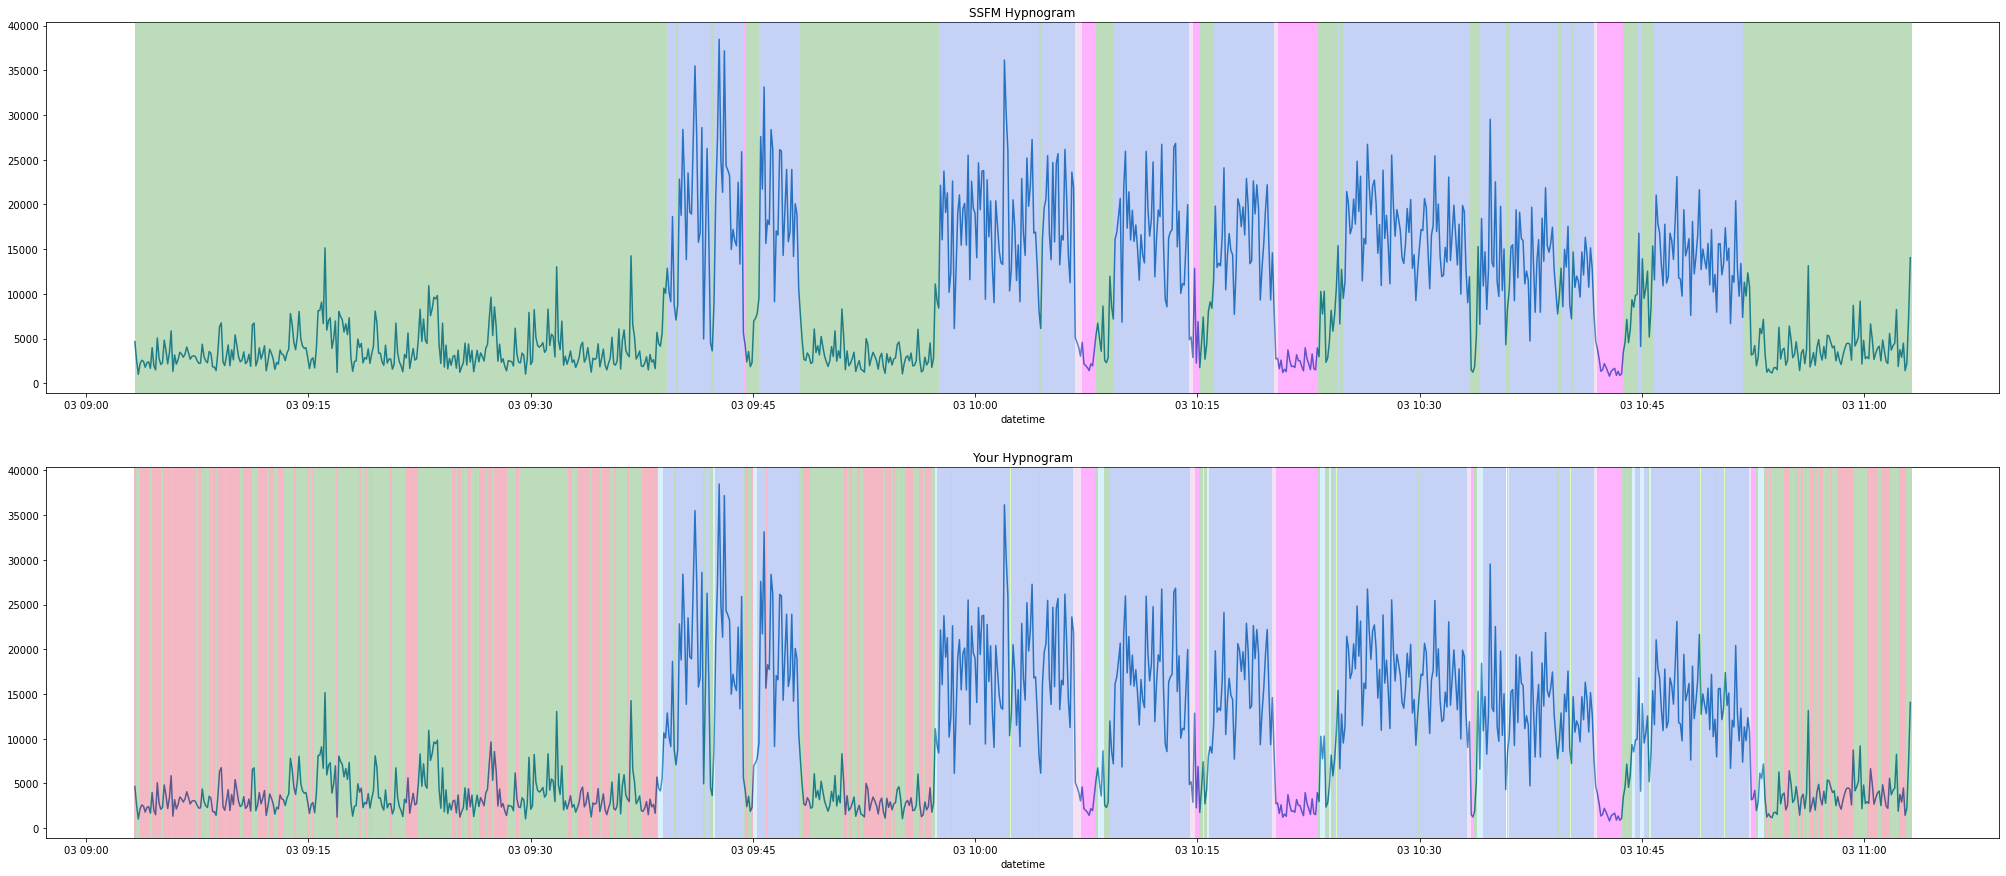

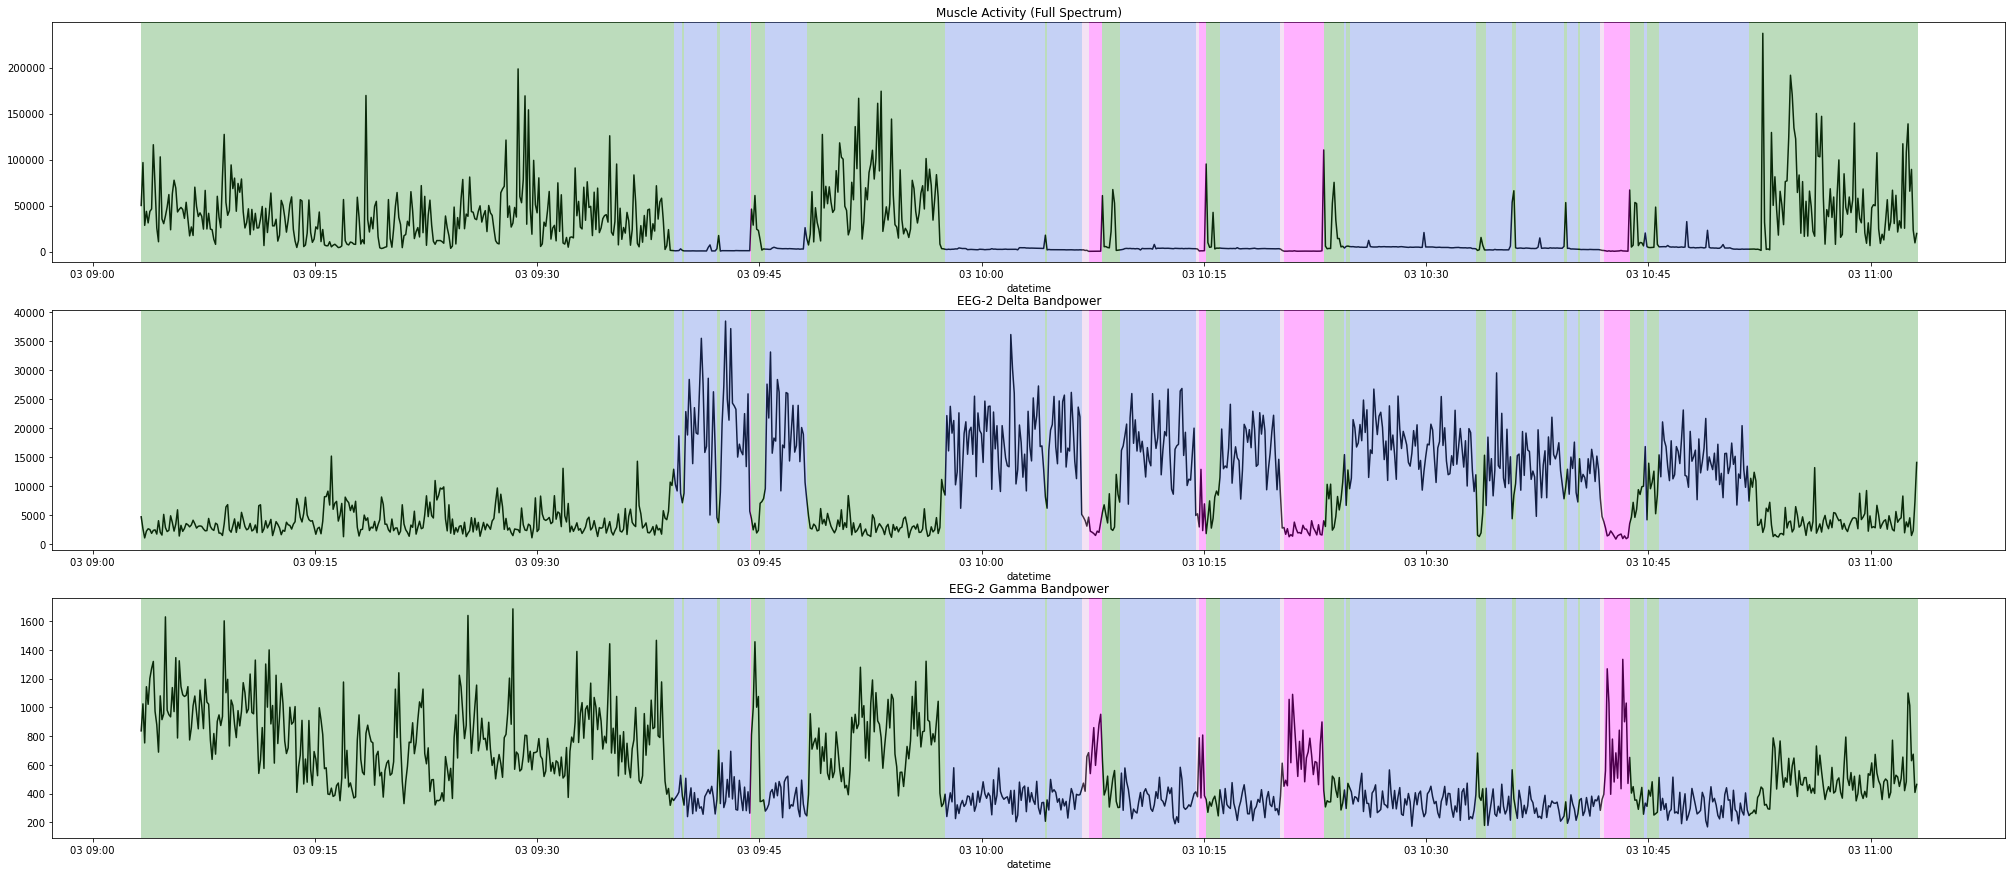

In [246]:
v2h4 = ssfm_v2(test['8_1_spg'], mspg, nrem_percentiles=[50, 52, 56, 58], rem_percentiles=[90, 93, 96, 99], chan=2, user_hyp=ht)

In [247]:
kd.get_frac_oc([ht, v2h4], ['kd', 'ssfm'])

duration                                                        \
state        Art Brief-Arousal       NREM       REM Transition-to-NREM   
kd     21.258494      0.333178  40.644522  5.230415           2.894437   
ssfm         NaN           NaN  39.980545  4.961089                NaN   

                                              
state Transition-to-REM    Unsure       Wake  
kd             1.455555  0.092911  28.090488  
ssfm           0.972763       NaN  54.085603